In [7]:
import pandas as pd
feats=pd.read_csv('osi_project_feats_final.csv')
targets=pd.read_csv('osi_project_target_final.csv')
pd.concat([feats,targets],axis=1).head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Region_1.1,Region_2.1,Region_3.1,Region_4.1,Region_5.1,Region_6.1,Region_7.1,Region_8.1,Region_9.1,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,...,0,0,1,0,0,0,0,0,0,0
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,...,0,1,0,0,0,0,0,0,0,0
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,...,1,0,0,0,0,0,0,0,0,0


In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(feats,targets, test_size=0.2,random_state=42)

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l1,l2,l1_l2
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.models import Sequential
def build_fn1(activation='relu',optimizer='adam',regularization_param=0.1,input_dim=x_train.shape[1]):
    model=Sequential()
    model.add(Dense(2,activation=activation,kernel_initializer=tf.keras.initializers.HeNormal(),kernel_regularizer=l1(regularization_param)))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
    return model
def build_fn2(activation='relu',optimizer='adam',regularization_param=0.1):
    model=Sequential()
    model.add(Dense(4,activation=activation,kernel_initializer=tf.keras.initializers.HeNormal(),kernel_regularizer=l1(regularization_param),input_dim=x_train.shape[1]))
    model.add(Dense(2,activation=activation,kernel_initializer=tf.keras.initializers.HeNormal(),kernel_regularizer=l1(regularization_param)))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
    return model
def build_fn3(activation='relu',optimizer='adam',regularization_param=0.1):
    model=Sequential()
    model.add(Dense(8,activation=activation,kernel_initializer=tf.keras.initializers.HeNormal(),kernel_regularizer=l1(regularization_param),input_dim=x_train.shape[1]))
    model.add(Dense(4,activation=activation,kernel_initializer=tf.keras.initializers.HeNormal(),kernel_regularizer=l1(regularization_param)))
    model.add(Dense(2,activation=activation,kernel_initializer=tf.keras.initializers.HeNormal(),kernel_regularizer=l1(regularization_param)))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
    return model


In [10]:
import numpy as np
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
models=[build_fn1,build_fn2,build_fn3]
optimizers=['adam','rmsprop','sgd']
regularization_param=np.logspace(-2,6,9)
len(regularization_param)

9

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
cross_val=KFold(n_splits=5)
batch_sizes=[5,10,15]
epochs=[5,10]
param_grid=dict(optimizer=optimizers,regularization_param=regularization_param,batch_size=batch_sizes,epochs=epochs)

In [32]:
results={}
for model in models:
    estimator=KerasClassifier(build_fn=model,verbose=1,shuffle=True)
    gs=GridSearchCV(estimator=estimator, param_grid=param_grid, cv=cross_val)
    result=gs.fit(x_train,y_train)
    results[model]=result

Epoch 1/5
1579/1579 [==============================] - 2s 476us/step - loss: 4.9750 - accuracy: 0.7926
Epoch 2/5
1579/1579 [==============================] - 1s 455us/step - loss: 0.4515 - accuracy: 0.8454
Epoch 3/5
1579/1579 [==============================] - 1s 457us/step - loss: 0.4266 - accuracy: 0.8427
Epoch 4/5
1579/1579 [==============================] - 1s 462us/step - loss: 0.4120 - accuracy: 0.8476
Epoch 5/5
395/395 [==============================] - 0s 460us/step - loss: 0.4069 - accuracy: 0.8571
Epoch 1/5
1579/1579 [==============================] - 1s 461us/step - loss: 1.8355 - accuracy: 0.8135
Epoch 2/5
1579/1579 [==============================] - 1s 460us/step - loss: 0.4569 - accuracy: 0.8427
Epoch 3/5
1579/1579 [==============================] - 1s 465us/step - loss: 0.4197 - accuracy: 0.8486
Epoch 4/5
1579/1579 [==============================] - 1s 461us/step - loss: 0.4137 - accuracy: 0.8531
Epoch 5/5
395/395 [==============================] - 0s 379us/step - loss: 

Epoch 4/5
1579/1579 [==============================] - 1s 476us/step - loss: 0.4672 - accuracy: 0.8478
Epoch 5/5
395/395 [==============================] - 0s 372us/step - loss: 0.4658 - accuracy: 0.8429
Epoch 1/5
1579/1579 [==============================] - 1s 458us/step - loss: 5.4361 - accuracy: 0.8325
Epoch 2/5
1579/1579 [==============================] - 1s 479us/step - loss: 0.4833 - accuracy: 0.8469
Epoch 3/5
1579/1579 [==============================] - 1s 455us/step - loss: 0.4845 - accuracy: 0.8504
Epoch 4/5
1579/1579 [==============================] - 1s 464us/step - loss: 0.4715 - accuracy: 0.8487
Epoch 5/5
395/395 [==============================] - 0s 366us/step - loss: 0.4630 - accuracy: 0.8438
Epoch 1/5
1579/1579 [==============================] - 1s 453us/step - loss: 69.9242 - accuracy: 0.7620
Epoch 2/5
1579/1579 [==============================] - 1s 456us/step - loss: 0.7838 - accuracy: 0.8468
Epoch 3/5
1579/1579 [==============================] - 1s 458us/step - loss:

1579/1579 [==============================] - 1s 458us/step - loss: 4601065.8847 - accuracy: 0.7433
Epoch 2/5
1579/1579 [==============================] - 1s 460us/step - loss: 20852.1568 - accuracy: 0.8394
Epoch 3/5
1579/1579 [==============================] - 1s 459us/step - loss: 20892.3026 - accuracy: 0.8404
Epoch 4/5
1579/1579 [==============================] - 1s 460us/step - loss: 20829.2543 - accuracy: 0.8468
Epoch 5/5
395/395 [==============================] - 0s 384us/step - loss: 18969.4609 - accuracy: 0.8555
Epoch 1/5
1579/1579 [==============================] - 1s 454us/step - loss: 4242607.3816 - accuracy: 0.4827
Epoch 2/5
1579/1579 [==============================] - 1s 476us/step - loss: 18916.5586 - accuracy: 0.8434
Epoch 3/5
1579/1579 [==============================] - 1s 500us/step - loss: 18746.6717 - accuracy: 0.8522
Epoch 4/5
1579/1579 [==============================] - 1s 476us/step - loss: 18728.9159 - accuracy: 0.8466
Epoch 5/5
395/395 [==========================

395/395 [==============================] - 0s 383us/step - loss: 8.0334 - accuracy: 0.8505
Epoch 1/5
1579/1579 [==============================] - 1s 456us/step - loss: 439.1789 - accuracy: 0.7489
Epoch 2/5
1579/1579 [==============================] - 1s 437us/step - loss: 8.2681 - accuracy: 0.8385
Epoch 3/5
1579/1579 [==============================] - 1s 437us/step - loss: 8.1964 - accuracy: 0.8433
Epoch 4/5
1579/1579 [==============================] - 1s 461us/step - loss: 8.1954 - accuracy: 0.8408
Epoch 5/5
395/395 [==============================] - 0s 452us/step - loss: 8.5181 - accuracy: 0.8469
Epoch 1/5
1579/1579 [==============================] - 1s 524us/step - loss: 445.1760 - accuracy: 0.7825
Epoch 2/5
1579/1579 [==============================] - 1s 507us/step - loss: 8.2300 - accuracy: 0.8400
Epoch 3/5
1579/1579 [==============================] - 1s 478us/step - loss: 8.1766 - accuracy: 0.8471
Epoch 4/5
1579/1579 [==============================] - 1s 512us/step - loss: 8.1661

395/395 [==============================] - 0s 377us/step - loss: 0.6469 - accuracy: 0.8469
Epoch 1/5
1579/1579 [==============================] - 1s 436us/step - loss: 13.4415 - accuracy: 0.8392
Epoch 2/5
1579/1579 [==============================] - 1s 434us/step - loss: 1.1626 - accuracy: 0.8424
Epoch 3/5
1579/1579 [==============================] - 1s 439us/step - loss: 1.1137 - accuracy: 0.8527
Epoch 4/5
1579/1579 [==============================] - 1s 437us/step - loss: 1.1099 - accuracy: 0.8501
Epoch 5/5
395/395 [==============================] - 0s 366us/step - loss: 1.1084 - accuracy: 0.8429
Epoch 1/5
1579/1579 [==============================] - 1s 444us/step - loss: 0.7994 - accuracy: 0.83050s - loss: 1.049
Epoch 2/5
1579/1579 [==============================] - 1s 444us/step - loss: 0.4883 - accuracy: 0.8488
Epoch 3/5
1579/1579 [==============================] - 1s 440us/step - loss: 0.4620 - accuracy: 0.8444
Epoch 4/5
1579/1579 [==============================] - 1s 438us/step -

395/395 [==============================] - 0s 365us/step - loss: 1998241.5000 - accuracy: 0.2321
Epoch 1/5
1579/1579 [==============================] - 1s 413us/step - loss: 3474169.1472 - accuracy: 0.8223
Epoch 2/5
1579/1579 [==============================] - 1s 420us/step - loss: 5216104.9207 - accuracy: 0.8384
Epoch 3/5
1579/1579 [==============================] - 1s 416us/step - loss: 4685485.4252 - accuracy: 0.8500
Epoch 4/5
1579/1579 [==============================] - 1s 436us/step - loss: 3768441.2937 - accuracy: 0.8370
Epoch 5/5
395/395 [==============================] - 0s 387us/step - loss: 3584813.0000 - accuracy: 0.8438
Epoch 1/5
1579/1579 [==============================] - 1s 433us/step - loss: 269963769.2106 - accuracy: 0.84220s - loss: 258305357.7590 - ac
Epoch 2/5
1579/1579 [==============================] - 1s 441us/step - loss: 431450022.3797 - accuracy: 0.8427
Epoch 3/5
1579/1579 [==============================] - 1s 446us/step - loss: 260714101.1949 - accuracy: 0.84

1579/1579 [==============================] - 1s 452us/step - loss: 0.4162 - accuracy: 0.8479
Epoch 9/10
1579/1579 [==============================] - 1s 456us/step - loss: 0.4143 - accuracy: 0.8472
Epoch 10/10
395/395 [==============================] - 0s 381us/step - loss: 0.4034 - accuracy: 0.8438
Epoch 1/10
1579/1579 [==============================] - 1s 457us/step - loss: 9.6438 - accuracy: 0.6937
Epoch 2/10
1579/1579 [==============================] - 1s 457us/step - loss: 0.7361 - accuracy: 0.8527
Epoch 3/10
1579/1579 [==============================] - 1s 454us/step - loss: 0.6097 - accuracy: 0.8652
Epoch 4/10
1579/1579 [==============================] - 1s 458us/step - loss: 0.6516 - accuracy: 0.8625
Epoch 5/10
1579/1579 [==============================] - 1s 457us/step - loss: 0.6333 - accuracy: 0.8568
Epoch 6/10
1579/1579 [==============================] - 1s 455us/step - loss: 0.5793 - accuracy: 0.8552
Epoch 7/10
1579/1579 [==============================] - 1s 454us/step - loss

1579/1579 [==============================] - 1s 457us/step - loss: 48.6342 - accuracy: 0.7322
Epoch 2/10
1579/1579 [==============================] - 1s 449us/step - loss: 0.6843 - accuracy: 0.8469
Epoch 3/10
1579/1579 [==============================] - 1s 442us/step - loss: 0.6903 - accuracy: 0.8387
Epoch 4/10
1579/1579 [==============================] - 1s 445us/step - loss: 0.6699 - accuracy: 0.8485
Epoch 5/10
1579/1579 [==============================] - 1s 439us/step - loss: 0.6515 - accuracy: 0.8414
Epoch 6/10
1579/1579 [==============================] - 1s 436us/step - loss: 0.6166 - accuracy: 0.8492
Epoch 7/10
1579/1579 [==============================] - 1s 456us/step - loss: 0.6982 - accuracy: 0.8422
Epoch 8/10
1579/1579 [==============================] - 1s 461us/step - loss: 0.6089 - accuracy: 0.8449
Epoch 9/10
1579/1579 [==============================] - 1s 442us/step - loss: 0.6115 - accuracy: 0.8452
Epoch 10/10
395/395 [==============================] - 0s 358us/step - los

1579/1579 [==============================] - 1s 457us/step - loss: 192.0055 - accuracy: 0.8465
Epoch 4/10
1579/1579 [==============================] - 1s 467us/step - loss: 191.6072 - accuracy: 0.8523
Epoch 5/10
1579/1579 [==============================] - 1s 487us/step - loss: 190.0712 - accuracy: 0.8506
Epoch 6/10
1579/1579 [==============================] - 1s 434us/step - loss: 186.5343 - accuracy: 0.8489
Epoch 7/10
1579/1579 [==============================] - 1s 443us/step - loss: 187.8273 - accuracy: 0.8431
Epoch 8/10
1579/1579 [==============================] - 1s 451us/step - loss: 188.2198 - accuracy: 0.8472
Epoch 9/10
1579/1579 [==============================] - 1s 454us/step - loss: 187.9943 - accuracy: 0.8470
Epoch 10/10
395/395 [==============================] - 0s 381us/step - loss: 181.2203 - accuracy: 0.8429
Epoch 1/10
1579/1579 [==============================] - 1s 490us/step - loss: 39429.0820 - accuracy: 0.8099
Epoch 2/10
1579/1579 [==============================] - 

1579/1579 [==============================] - 1s 410us/step - loss: 0.4294 - accuracy: 0.8443
Epoch 4/10
1579/1579 [==============================] - 1s 464us/step - loss: 0.4142 - accuracy: 0.8364
Epoch 5/10
1579/1579 [==============================] - 1s 409us/step - loss: 0.4181 - accuracy: 0.8495
Epoch 6/10
1579/1579 [==============================] - 1s 417us/step - loss: 0.4096 - accuracy: 0.8507
Epoch 7/10
1579/1579 [==============================] - 1s 457us/step - loss: 0.3781 - accuracy: 0.8498
Epoch 8/10
1579/1579 [==============================] - 1s 407us/step - loss: 0.3928 - accuracy: 0.8432
Epoch 9/10
1579/1579 [==============================] - 1s 433us/step - loss: 0.3918 - accuracy: 0.8437
Epoch 10/10
395/395 [==============================] - 0s 377us/step - loss: 0.4140 - accuracy: 0.8469
Epoch 1/10
1579/1579 [==============================] - 1s 425us/step - loss: 11.3958 - accuracy: 0.8028
Epoch 2/10
1579/1579 [==============================] - 1s 403us/step - los

1579/1579 [==============================] - 1s 412us/step - loss: 1.2287 - accuracy: 0.8517
Epoch 7/10
1579/1579 [==============================] - 1s 413us/step - loss: 1.2091 - accuracy: 0.8528
Epoch 8/10
1579/1579 [==============================] - 1s 413us/step - loss: 1.2148 - accuracy: 0.8482
Epoch 9/10
1579/1579 [==============================] - 1s 400us/step - loss: 1.2198 - accuracy: 0.8512
Epoch 10/10
395/395 [==============================] - 0s 378us/step - loss: 1.2130 - accuracy: 0.8505
Epoch 1/10
1579/1579 [==============================] - 1s 431us/step - loss: 46.8770 - accuracy: 0.7775 0s - loss: 102.8164 - accur
Epoch 2/10
1579/1579 [==============================] - 1s 461us/step - loss: 1.2874 - accuracy: 0.8363
Epoch 3/10
1579/1579 [==============================] - 1s 438us/step - loss: 1.2293 - accuracy: 0.8473
Epoch 4/10
1579/1579 [==============================] - 1s 408us/step - loss: 1.2295 - accuracy: 0.8480
Epoch 5/10
1579/1579 [=========================

Epoch 8/10
1579/1579 [==============================] - 1s 400us/step - loss: 8.1240 - accuracy: 0.8494
Epoch 9/10
1579/1579 [==============================] - 1s 412us/step - loss: 8.1384 - accuracy: 0.8411
Epoch 10/10
395/395 [==============================] - 0s 357us/step - loss: 8.1016 - accuracy: 0.8429
Epoch 1/10
1579/1579 [==============================] - 1s 425us/step - loss: 509.2394 - accuracy: 0.4843
Epoch 2/10
1579/1579 [==============================] - 1s 449us/step - loss: 8.1105 - accuracy: 0.8533
Epoch 3/10
1579/1579 [==============================] - 1s 464us/step - loss: 8.1097 - accuracy: 0.8436
Epoch 4/10
1579/1579 [==============================] - 1s 406us/step - loss: 8.1008 - accuracy: 0.8504
Epoch 5/10
1579/1579 [==============================] - 1s 401us/step - loss: 8.0865 - accuracy: 0.8517
Epoch 6/10
1579/1579 [==============================] - 1s 393us/step - loss: 8.0844 - accuracy: 0.8504
Epoch 7/10
1579/1579 [==============================] - 1s 396u

1579/1579 [==============================] - 1s 475us/step - loss: 7701.3894 - accuracy: 0.8466
Epoch 10/10
395/395 [==============================] - 0s 387us/step - loss: 8051.6143 - accuracy: 0.8469
Epoch 1/10
1579/1579 [==============================] - 1s 445us/step - loss: 459974.7259 - accuracy: 0.5580
Epoch 2/10
1579/1579 [==============================] - 1s 425us/step - loss: 7699.4523 - accuracy: 0.8518
Epoch 3/10
1579/1579 [==============================] - 1s 473us/step - loss: 7701.3805 - accuracy: 0.8505
Epoch 4/10
1579/1579 [==============================] - 1s 521us/step - loss: 7699.4823 - accuracy: 0.8557
Epoch 5/10
1579/1579 [==============================] - 1s 469us/step - loss: 7701.3748 - accuracy: 0.8437
Epoch 6/10
1579/1579 [==============================] - 1s 442us/step - loss: 7699.5116 - accuracy: 0.8484
Epoch 7/10
1579/1579 [==============================] - 1s 471us/step - loss: 7701.3627 - accuracy: 0.8532
Epoch 8/10
1579/1579 [=========================

395/395 [==============================] - 0s 375us/step - loss: 2.7003 - accuracy: 0.8505
Epoch 1/10
1579/1579 [==============================] - 1s 434us/step - loss: 1.7488 - accuracy: 0.8501
Epoch 2/10
1579/1579 [==============================] - 1s 446us/step - loss: 0.6318 - accuracy: 0.8535
Epoch 3/10
1579/1579 [==============================] - 1s 439us/step - loss: 1.0251 - accuracy: 0.8505
Epoch 4/10
1579/1579 [==============================] - 1s 435us/step - loss: 0.6315 - accuracy: 0.8485
Epoch 5/10
1579/1579 [==============================] - 1s 443us/step - loss: 1.6570 - accuracy: 0.8478
Epoch 6/10
1579/1579 [==============================] - 1s 440us/step - loss: 1.8661 - accuracy: 0.8442
Epoch 7/10
1579/1579 [==============================] - 1s 445us/step - loss: 2.3862 - accuracy: 0.8552
Epoch 8/10
1579/1579 [==============================] - 1s 431us/step - loss: 2.0897 - accuracy: 0.8418
Epoch 9/10
1579/1579 [==============================] - 1s 438us/step - loss:

1579/1579 [==============================] - 1s 421us/step - loss: 142087.8349 - accuracy: 0.8468
Epoch 10/10
395/395 [==============================] - 0s 384us/step - loss: 745890.4375 - accuracy: 0.8571
Epoch 1/10
1579/1579 [==============================] - 1s 439us/step - loss: 19061.5882 - accuracy: 0.8279
Epoch 2/10
1579/1579 [==============================] - 1s 440us/step - loss: 60374.0175 - accuracy: 0.8208
Epoch 3/10
1579/1579 [==============================] - 1s 432us/step - loss: 174429.9804 - accuracy: 0.8317
Epoch 4/10
1579/1579 [==============================] - 1s 431us/step - loss: 296736.7196 - accuracy: 0.8456
Epoch 5/10
1579/1579 [==============================] - 1s 410us/step - loss: 627905.4732 - accuracy: 0.8298
Epoch 6/10
1579/1579 [==============================] - 1s 422us/step - loss: 471035.5774 - accuracy: 0.8466
Epoch 7/10
1579/1579 [==============================] - 1s 434us/step - loss: 312425.1464 - accuracy: 0.8469
Epoch 8/10
1579/1579 [===========

1579/1579 [==============================] - 1s 431us/step - loss: 301303476.6430 - accuracy: 0.8348
Epoch 5/10
1579/1579 [==============================] - 1s 426us/step - loss: 1291685410.1873 - accuracy: 0.8415
Epoch 6/10
1579/1579 [==============================] - 1s 441us/step - loss: 271591882.0456 - accuracy: 0.8387
Epoch 7/10
1579/1579 [==============================] - 1s 434us/step - loss: 810737337.8835 - accuracy: 0.8444
Epoch 8/10
1579/1579 [==============================] - 1s 435us/step - loss: 1038924430.8051 - accuracy: 0.8448
Epoch 9/10
1579/1579 [==============================] - 1s 442us/step - loss: 727463784.5063 - accuracy: 0.84700s - loss: 800290427.7333 - accura
Epoch 10/10
395/395 [==============================] - 0s 376us/step - loss: 297514208.0000 - accuracy: 0.8438
Epoch 1/10
1579/1579 [==============================] - 1s 438us/step - loss: 29773460767.8593 - accuracy: 0.8173
Epoch 2/10
1579/1579 [==============================] - 1s 442us/step - loss: 

790/790 [==============================] - 0s 459us/step - loss: 0.4265 - accuracy: 0.8460
Epoch 5/5
198/198 [==============================] - 0s 374us/step - loss: 0.4016 - accuracy: 0.8438
Epoch 1/5
790/790 [==============================] - 1s 483us/step - loss: 2.2946 - accuracy: 0.8170
Epoch 2/5
790/790 [==============================] - 0s 499us/step - loss: 0.6063 - accuracy: 0.8518
Epoch 3/5
790/790 [==============================] - 0s 442us/step - loss: 0.5148 - accuracy: 0.8431
Epoch 4/5
790/790 [==============================] - 0s 449us/step - loss: 0.4258 - accuracy: 0.85690s - loss: 0.4225 - accura
Epoch 5/5
198/198 [==============================] - 0s 405us/step - loss: 0.4114 - accuracy: 0.8571
Epoch 1/5
790/790 [==============================] - 1s 482us/step - loss: 2.9554 - accuracy: 0.7865
Epoch 2/5
790/790 [==============================] - 0s 458us/step - loss: 0.5245 - accuracy: 0.8488
Epoch 3/5
790/790 [==============================] - 0s 452us/step - loss: 

790/790 [==============================] - 0s 462us/step - loss: 199.8398 - accuracy: 0.8449
Epoch 5/5
198/198 [==============================] - 0s 402us/step - loss: 205.2980 - accuracy: 0.8505
Epoch 1/5
790/790 [==============================] - 1s 446us/step - loss: 67195.4201 - accuracy: 0.7533
Epoch 2/5
790/790 [==============================] - 0s 453us/step - loss: 197.5153 - accuracy: 0.8427
Epoch 3/5
790/790 [==============================] - 0s 452us/step - loss: 196.4390 - accuracy: 0.8461
Epoch 4/5
790/790 [==============================] - 0s 443us/step - loss: 195.8927 - accuracy: 0.8523
Epoch 5/5
198/198 [==============================] - 0s 393us/step - loss: 182.7539 - accuracy: 0.8469
Epoch 1/5
790/790 [==============================] - 1s 479us/step - loss: 72143.4880 - accuracy: 0.4870
Epoch 2/5
790/790 [==============================] - 0s 472us/step - loss: 208.3176 - accuracy: 0.8396
Epoch 3/5
790/790 [==============================] - 0s 443us/step - loss: 206.

790/790 [==============================] - 0s 477us/step - loss: 0.5318 - accuracy: 0.8518
Epoch 4/5
790/790 [==============================] - 0s 422us/step - loss: 0.5112 - accuracy: 0.8426
Epoch 5/5
198/198 [==============================] - 0s 380us/step - loss: 0.5059 - accuracy: 0.8429
Epoch 1/5
790/790 [==============================] - 1s 461us/step - loss: 7.2488 - accuracy: 0.8325
Epoch 2/5
790/790 [==============================] - 0s 472us/step - loss: 0.6147 - accuracy: 0.8366
Epoch 3/5
790/790 [==============================] - 0s 437us/step - loss: 0.5538 - accuracy: 0.8372
Epoch 4/5
790/790 [==============================] - 0s 414us/step - loss: 0.5433 - accuracy: 0.8411
Epoch 5/5
198/198 [==============================] - 0s 388us/step - loss: 0.5165 - accuracy: 0.8438
Epoch 1/5
790/790 [==============================] - 1s 429us/step - loss: 71.9402 - accuracy: 0.8402
Epoch 2/5
790/790 [==============================] - 0s 425us/step - loss: 1.3099 - accuracy: 0.8403

Epoch 1/5
790/790 [==============================] - 1s 433us/step - loss: 6929.3092 - accuracy: 0.7965
Epoch 2/5
790/790 [==============================] - 0s 413us/step - loss: 76.9876 - accuracy: 0.8396
Epoch 3/5
790/790 [==============================] - 0s 421us/step - loss: 76.9717 - accuracy: 0.8445
Epoch 4/5
790/790 [==============================] - 0s 480us/step - loss: 76.9430 - accuracy: 0.8569
Epoch 5/5
198/198 [==============================] - 0s 377us/step - loss: 81.1008 - accuracy: 0.8469
Epoch 1/5
790/790 [==============================] - 1s 433us/step - loss: 6628.4981 - accuracy: 0.7546
Epoch 2/5
790/790 [==============================] - 0s 417us/step - loss: 77.5169 - accuracy: 0.8370
Epoch 3/5
790/790 [==============================] - 0s 418us/step - loss: 77.4779 - accuracy: 0.8488
Epoch 4/5
790/790 [==============================] - 0s 394us/step - loss: 77.4555 - accuracy: 0.8462
Epoch 5/5
198/198 [==============================] - 0s 379us/step - loss: 81.

198/198 [==============================] - 0s 383us/step - loss: 0.5828 - accuracy: 0.8429
Epoch 1/5
790/790 [==============================] - 1s 450us/step - loss: 2.0435 - accuracy: 0.8347
Epoch 2/5
790/790 [==============================] - 0s 422us/step - loss: 1.3387 - accuracy: 0.8475
Epoch 3/5
790/790 [==============================] - 0s 379us/step - loss: 1.1474 - accuracy: 0.8456
Epoch 4/5
790/790 [==============================] - 0s 393us/step - loss: 0.9786 - accuracy: 0.8516
Epoch 5/5
198/198 [==============================] - 0s 380us/step - loss: 0.7151 - accuracy: 0.8438
Epoch 1/5
790/790 [==============================] - 1s 428us/step - loss: 5.0051 - accuracy: 0.8336
Epoch 2/5
790/790 [==============================] - 0s 381us/step - loss: 5.2373 - accuracy: 0.8405
Epoch 3/5
790/790 [==============================] - 0s 374us/step - loss: 5.0718 - accuracy: 0.8462
Epoch 4/5
790/790 [==============================] - 0s 386us/step - loss: 13.4148 - accuracy: 0.8450

790/790 [==============================] - 1s 412us/step - loss: 12717247010.3502 - accuracy: 0.8019
Epoch 2/5
790/790 [==============================] - 0s 408us/step - loss: 39251670443.2061 - accuracy: 0.8079
Epoch 3/5
790/790 [==============================] - 0s 468us/step - loss: 53638476309.3603 - accuracy: 0.8359
Epoch 4/5
790/790 [==============================] - 0s 473us/step - loss: 23710035639.1808 - accuracy: 0.8307
Epoch 5/5
198/198 [==============================] - 0s 387us/step - loss: 13149715456.0000 - accuracy: 0.8566
Epoch 1/5
790/790 [==============================] - 1s 419us/step - loss: 10839658623.7481 - accuracy: 0.8129
Epoch 2/5
790/790 [==============================] - 0s 423us/step - loss: 44176963772.5209 - accuracy: 0.8190
Epoch 3/5
790/790 [==============================] - 0s 439us/step - loss: 52267583640.7585 - accuracy: 0.8358
Epoch 4/5
790/790 [==============================] - 0s 442us/step - loss: 89081104666.2149 - accuracy: 0.8336
Epoch 5/5
1

790/790 [==============================] - 0s 439us/step - loss: 0.4292 - accuracy: 0.8479
Epoch 10/10
198/198 [==============================] - 0s 392us/step - loss: 0.4391 - accuracy: 0.8429
Epoch 1/10
790/790 [==============================] - 1s 449us/step - loss: 8.6752 - accuracy: 0.6068
Epoch 2/10
790/790 [==============================] - 0s 452us/step - loss: 0.6249 - accuracy: 0.8447
Epoch 3/10
790/790 [==============================] - 0s 457us/step - loss: 0.5262 - accuracy: 0.8452
Epoch 4/10
790/790 [==============================] - 0s 488us/step - loss: 0.4731 - accuracy: 0.8482
Epoch 5/10
790/790 [==============================] - 0s 503us/step - loss: 0.4480 - accuracy: 0.8518
Epoch 6/10
790/790 [==============================] - 0s 466us/step - loss: 0.4296 - accuracy: 0.8537
Epoch 7/10
790/790 [==============================] - 0s 452us/step - loss: 0.4264 - accuracy: 0.8485
Epoch 8/10
790/790 [==============================] - 0s 451us/step - loss: 0.4167 - accurac

790/790 [==============================] - 0s 426us/step - loss: 2.2782 - accuracy: 0.8441
Epoch 6/10
790/790 [==============================] - 0s 424us/step - loss: 2.2111 - accuracy: 0.8504
Epoch 7/10
790/790 [==============================] - 0s 448us/step - loss: 2.1888 - accuracy: 0.8517
Epoch 8/10
790/790 [==============================] - 0s 443us/step - loss: 2.1901 - accuracy: 0.8434
Epoch 9/10
790/790 [==============================] - 0s 453us/step - loss: 2.1901 - accuracy: 0.8478
Epoch 10/10
198/198 [==============================] - 0s 394us/step - loss: 2.3361 - accuracy: 0.8429
Epoch 1/10
790/790 [==============================] - 1s 450us/step - loss: 640.7782 - accuracy: 0.5793
Epoch 2/10
790/790 [==============================] - 0s 441us/step - loss: 2.6249 - accuracy: 0.8383
Epoch 3/10
790/790 [==============================] - 0s 456us/step - loss: 2.5359 - accuracy: 0.8364
Epoch 4/10
790/790 [==============================] - 0s 478us/step - loss: 2.3721 - accur

198/198 [==============================] - 0s 384us/step - loss: 1786.3871 - accuracy: 0.8469
Epoch 1/10
790/790 [==============================] - 1s 471us/step - loss: 732366.2725 - accuracy: 0.8389
Epoch 2/10
790/790 [==============================] - 0s 487us/step - loss: 1951.3582 - accuracy: 0.8495
Epoch 3/10
790/790 [==============================] - 0s 474us/step - loss: 1948.0511 - accuracy: 0.8479
Epoch 4/10
790/790 [==============================] - 0s 441us/step - loss: 1938.9153 - accuracy: 0.8507
Epoch 5/10
790/790 [==============================] - 0s 429us/step - loss: 1944.8056 - accuracy: 0.8491
Epoch 6/10
790/790 [==============================] - 0s 428us/step - loss: 1951.4768 - accuracy: 0.8514
Epoch 7/10
790/790 [==============================] - 0s 437us/step - loss: 1952.1018 - accuracy: 0.8548
Epoch 8/10
790/790 [==============================] - 0s 444us/step - loss: 1954.1497 - accuracy: 0.8515
Epoch 9/10
790/790 [==============================] - 0s 475us/s

790/790 [==============================] - 0s 474us/step - loss: 0.3850 - accuracy: 0.8774
Epoch 5/10
790/790 [==============================] - 0s 442us/step - loss: 0.3800 - accuracy: 0.8780
Epoch 6/10
790/790 [==============================] - 0s 418us/step - loss: 0.3724 - accuracy: 0.8795
Epoch 7/10
790/790 [==============================] - 0s 426us/step - loss: 0.3863 - accuracy: 0.8746
Epoch 8/10
790/790 [==============================] - 0s 399us/step - loss: 0.3541 - accuracy: 0.8828
Epoch 9/10
790/790 [==============================] - 0s 410us/step - loss: 0.3666 - accuracy: 0.8766
Epoch 10/10
198/198 [==============================] - 0s 380us/step - loss: 0.3403 - accuracy: 0.8931
Epoch 1/10
790/790 [==============================] - 1s 432us/step - loss: 22.9703 - accuracy: 0.6168
Epoch 2/10
790/790 [==============================] - 0s 412us/step - loss: 0.7341 - accuracy: 0.8605
Epoch 3/10
790/790 [==============================] - 0s 426us/step - loss: 0.6466 - accura

790/790 [==============================] - 0s 419us/step - loss: 0.4957 - accuracy: 0.8472
Epoch 9/10
790/790 [==============================] - 0s 411us/step - loss: 0.4987 - accuracy: 0.8443
Epoch 10/10
198/198 [==============================] - 0s 382us/step - loss: 0.4998 - accuracy: 0.8438
Epoch 1/10
790/790 [==============================] - 1s 471us/step - loss: 61.4613 - accuracy: 0.8455
Epoch 2/10
790/790 [==============================] - 0s 475us/step - loss: 1.2627 - accuracy: 0.8457
Epoch 3/10
790/790 [==============================] - 0s 476us/step - loss: 1.2248 - accuracy: 0.8472
Epoch 4/10
790/790 [==============================] - 0s 397us/step - loss: 1.2103 - accuracy: 0.8536
Epoch 5/10
790/790 [==============================] - 0s 393us/step - loss: 1.2244 - accuracy: 0.8456
Epoch 6/10
790/790 [==============================] - 0s 402us/step - loss: 1.2152 - accuracy: 0.8442
Epoch 7/10
790/790 [==============================] - 0s 436us/step - loss: 1.2273 - accura

790/790 [==============================] - 0s 411us/step - loss: 77.0126 - accuracy: 0.8410
Epoch 5/10
790/790 [==============================] - 0s 401us/step - loss: 76.9909 - accuracy: 0.8528
Epoch 6/10
790/790 [==============================] - 0s 414us/step - loss: 76.9456 - accuracy: 0.8538
Epoch 7/10
790/790 [==============================] - 0s 397us/step - loss: 77.0325 - accuracy: 0.8534
Epoch 8/10
790/790 [==============================] - 0s 395us/step - loss: 76.9716 - accuracy: 0.8450
Epoch 9/10
790/790 [==============================] - 0s 429us/step - loss: 77.0152 - accuracy: 0.8484
Epoch 10/10
198/198 [==============================] - 0s 375us/step - loss: 73.0703 - accuracy: 0.8438
Epoch 1/10
790/790 [==============================] - 1s 443us/step - loss: 58970.1569 - accuracy: 0.7747
Epoch 2/10
790/790 [==============================] - 0s 399us/step - loss: 766.2763 - accuracy: 0.8474
Epoch 3/10
790/790 [==============================] - 0s 405us/step - loss: 770

Epoch 6/10
790/790 [==============================] - 0s 407us/step - loss: 7699.8538 - accuracy: 0.8427
Epoch 7/10
790/790 [==============================] - 0s 420us/step - loss: 7699.8638 - accuracy: 0.8440
Epoch 8/10
790/790 [==============================] - 0s 468us/step - loss: 7699.8390 - accuracy: 0.8473
Epoch 9/10
790/790 [==============================] - 0s 475us/step - loss: 7699.8744 - accuracy: 0.8430
Epoch 10/10
198/198 [==============================] - 0s 382us/step - loss: 7592.4932 - accuracy: 0.8505
Epoch 1/10
790/790 [==============================] - 1s 419us/step - loss: 592195.5998 - accuracy: 0.5001
Epoch 2/10
790/790 [==============================] - 0s 392us/step - loss: 7698.0777 - accuracy: 0.8428
Epoch 3/10
790/790 [==============================] - 0s 408us/step - loss: 7698.3697 - accuracy: 0.8455
Epoch 4/10
790/790 [==============================] - 0s 427us/step - loss: 7697.6785 - accuracy: 0.8488
Epoch 5/10
790/790 [==============================] 

198/198 [==============================] - 0s 384us/step - loss: 1.9008 - accuracy: 0.8571
Epoch 1/10
790/790 [==============================] - 1s 419us/step - loss: 1.7217 - accuracy: 0.8364
Epoch 2/10
790/790 [==============================] - 0s 396us/step - loss: 0.7489 - accuracy: 0.8484
Epoch 3/10
790/790 [==============================] - 0s 368us/step - loss: 0.6666 - accuracy: 0.8483
Epoch 4/10
790/790 [==============================] - 0s 389us/step - loss: 0.7217 - accuracy: 0.8484
Epoch 5/10
790/790 [==============================] - 0s 440us/step - loss: 1.2258 - accuracy: 0.8467
Epoch 6/10
790/790 [==============================] - 0s 469us/step - loss: 0.6656 - accuracy: 0.8561
Epoch 7/10
790/790 [==============================] - 0s 437us/step - loss: 1.0768 - accuracy: 0.8480
Epoch 8/10
790/790 [==============================] - 0s 368us/step - loss: 1.2655 - accuracy: 0.8485
Epoch 9/10
790/790 [==============================] - 0s 369us/step - loss: 1.0275 - accuracy

790/790 [==============================] - 0s 437us/step - loss: 4.8736 - accuracy: 0.8556
Epoch 4/10
790/790 [==============================] - 0s 416us/step - loss: 5.8723 - accuracy: 0.8490
Epoch 5/10
790/790 [==============================] - 0s 379us/step - loss: 3.6868 - accuracy: 0.8523
Epoch 6/10
790/790 [==============================] - 0s 379us/step - loss: 20.3897 - accuracy: 0.8514
Epoch 7/10
790/790 [==============================] - 0s 398us/step - loss: 11.5479 - accuracy: 0.8480
Epoch 8/10
790/790 [==============================] - 0s 401us/step - loss: 4.0806 - accuracy: 0.8495
Epoch 9/10
790/790 [==============================] - 0s 386us/step - loss: 6.8025 - accuracy: 0.8536
Epoch 10/10
198/198 [==============================] - 0s 373us/step - loss: 11.2200 - accuracy: 0.8429
Epoch 1/10
790/790 [==============================] - 1s 412us/step - loss: 9.6007 - accuracy: 0.8421
Epoch 2/10
790/790 [==============================] - 0s 391us/step - loss: 3.7535 - accu

790/790 [==============================] - 0s 463us/step - loss: 1014721.0303 - accuracy: 0.8317
Epoch 6/10
790/790 [==============================] - 0s 422us/step - loss: 2861066.9539 - accuracy: 0.8373
Epoch 7/10
790/790 [==============================] - 0s 388us/step - loss: 1691417.8009 - accuracy: 0.8295
Epoch 8/10
790/790 [==============================] - 0s 387us/step - loss: 2187031.7845 - accuracy: 0.8413
Epoch 9/10
790/790 [==============================] - 0s 397us/step - loss: 1865336.1383 - accuracy: 0.8368
Epoch 10/10
198/198 [==============================] - 0s 376us/step - loss: 3508392.0000 - accuracy: 0.8469
Epoch 1/10
790/790 [==============================] - 1s 420us/step - loss: 1102776.1662 - accuracy: 0.8161
Epoch 2/10
790/790 [==============================] - 0s 404us/step - loss: 1222322.9474 - accuracy: 0.8230
Epoch 3/10
790/790 [==============================] - 0s 387us/step - loss: 1590720.6209 - accuracy: 0.8221
Epoch 4/10
790/790 [==================

198/198 [==============================] - 0s 375us/step - loss: 6234644676608.0000 - accuracy: 0.8571
Epoch 1/10
790/790 [==============================] - 1s 409us/step - loss: 1058547114138.4728 - accuracy: 0.8149
Epoch 2/10
790/790 [==============================] - 0s 395us/step - loss: 1179574631578.0530 - accuracy: 0.8057
Epoch 3/10
790/790 [==============================] - 0s 415us/step - loss: 1497108636631.8684 - accuracy: 0.8244
Epoch 4/10
790/790 [==============================] - 0s 427us/step - loss: 1032030902984.0101 - accuracy: 0.8209
Epoch 5/10
790/790 [==============================] - 0s 446us/step - loss: 1264385386674.6499 - accuracy: 0.7972
Epoch 6/10
790/790 [==============================] - 0s 394us/step - loss: 1258922851378.4880 - accuracy: 0.8277
Epoch 7/10
790/790 [==============================] - 0s 394us/step - loss: 1474845319716.8950 - accuracy: 0.8239
Epoch 8/10
790/790 [==============================] - 0s 389us/step - loss: 4734295761175.6260 - ac

527/527 [==============================] - 0s 440us/step - loss: 0.6492 - accuracy: 0.8449
Epoch 5/5
132/132 [==============================] - 0s 387us/step - loss: 0.6311 - accuracy: 0.8429
Epoch 1/5
527/527 [==============================] - 0s 477us/step - loss: 103.9121 - accuracy: 0.7361
Epoch 2/5
527/527 [==============================] - 0s 482us/step - loss: 0.7890 - accuracy: 0.8508
Epoch 3/5
527/527 [==============================] - 0s 446us/step - loss: 0.7159 - accuracy: 0.8477
Epoch 4/5
527/527 [==============================] - 0s 439us/step - loss: 0.6391 - accuracy: 0.8467
Epoch 5/5
132/132 [==============================] - 0s 390us/step - loss: 0.5993 - accuracy: 0.8438
Epoch 1/5
527/527 [==============================] - 0s 448us/step - loss: 780.4360 - accuracy: 0.8477
Epoch 2/5
527/527 [==============================] - 0s 450us/step - loss: 2.3984 - accuracy: 0.8442
Epoch 3/5
527/527 [==============================] - 0s 454us/step - loss: 2.3380 - accuracy: 0.8

527/527 [==============================] - 0s 435us/step - loss: 0.5806 - accuracy: 0.8459
Epoch 3/5
527/527 [==============================] - 0s 433us/step - loss: 0.4839 - accuracy: 0.8409
Epoch 4/5
527/527 [==============================] - 0s 432us/step - loss: 0.4455 - accuracy: 0.8514
Epoch 5/5
132/132 [==============================] - 0s 388us/step - loss: 0.3600 - accuracy: 0.8814
Epoch 1/5
527/527 [==============================] - 1s 446us/step - loss: 0.7825 - accuracy: 0.8461
Epoch 2/5
527/527 [==============================] - 0s 414us/step - loss: 0.5334 - accuracy: 0.8507
Epoch 3/5
527/527 [==============================] - 0s 409us/step - loss: 0.4667 - accuracy: 0.8504
Epoch 4/5
527/527 [==============================] - 0s 402us/step - loss: 0.4224 - accuracy: 0.8711
Epoch 5/5
132/132 [==============================] - 0s 391us/step - loss: 0.3617 - accuracy: 0.8794
Epoch 1/5
527/527 [==============================] - 1s 436us/step - loss: 1.1086 - accuracy: 0.8266


527/527 [==============================] - 0s 472us/step - loss: 77.4825 - accuracy: 0.8454
Epoch 5/5
132/132 [==============================] - 0s 371us/step - loss: 76.5280 - accuracy: 0.8469
Epoch 1/5
527/527 [==============================] - 1s 443us/step - loss: 8845.6605 - accuracy: 0.7543
Epoch 2/5
527/527 [==============================] - 0s 449us/step - loss: 77.1367 - accuracy: 0.8325
Epoch 3/5
527/527 [==============================] - 0s 474us/step - loss: 76.9618 - accuracy: 0.8503
Epoch 4/5
527/527 [==============================] - 0s 464us/step - loss: 77.0646 - accuracy: 0.8406
Epoch 5/5
132/132 [==============================] - 0s 364us/step - loss: 74.3283 - accuracy: 0.8429
Epoch 1/5
527/527 [==============================] - 1s 455us/step - loss: 7582.3827 - accuracy: 0.8410
Epoch 2/5
527/527 [==============================] - 0s 461us/step - loss: 77.0222 - accuracy: 0.8441
Epoch 3/5
527/527 [==============================] - 0s 467us/step - loss: 77.0486 - acc

527/527 [==============================] - 0s 417us/step - loss: 0.6429 - accuracy: 0.8543
Epoch 4/5
527/527 [==============================] - 0s 397us/step - loss: 0.6253 - accuracy: 0.8523
Epoch 5/5
132/132 [==============================] - 0s 378us/step - loss: 0.5098 - accuracy: 0.8438
Epoch 1/5
527/527 [==============================] - 0s 434us/step - loss: 11.9119 - accuracy: 0.8382
Epoch 2/5
527/527 [==============================] - 0s 406us/step - loss: 78.5692 - accuracy: 0.8473
Epoch 3/5
527/527 [==============================] - 0s 417us/step - loss: 68.2594 - accuracy: 0.8521
Epoch 4/5
527/527 [==============================] - 0s 434us/step - loss: 62.3901 - accuracy: 0.8400
Epoch 5/5
132/132 [==============================] - 0s 388us/step - loss: 52.5314 - accuracy: 0.8571
Epoch 1/5
527/527 [==============================] - 0s 432us/step - loss: 20.2405 - accuracy: 0.8396
Epoch 2/5
527/527 [==============================] - 0s 433us/step - loss: 8.5887 - accuracy: 0

132/132 [==============================] - 0s 398us/step - loss: 26135875584.0000 - accuracy: 0.8571
Epoch 1/5
527/527 [==============================] - 0s 441us/step - loss: 13457361738.6061 - accuracy: 0.8196
Epoch 2/5
527/527 [==============================] - 0s 439us/step - loss: 19024956402.4242 - accuracy: 0.8279
Epoch 3/5
527/527 [==============================] - 0s 439us/step - loss: 31458044191.0303 - accuracy: 0.8413
Epoch 4/5
527/527 [==============================] - 0s 434us/step - loss: 25191418868.3636 - accuracy: 0.8320
Epoch 5/5
132/132 [==============================] - 0s 377us/step - loss: 29332238336.0000 - accuracy: 0.8424
Epoch 1/5
527/527 [==============================] - 0s 424us/step - loss: 9071776968.0036 - accuracy: 0.8105
Epoch 2/5
527/527 [==============================] - 0s 401us/step - loss: 10994893798.7879 - accuracy: 0.8261
Epoch 3/5
527/527 [==============================] - 0s 423us/step - loss: 9746714351.7576 - accuracy: 0.8201
Epoch 4/5
527

132/132 [==============================] - 0s 379us/step - loss: 0.3677 - accuracy: 0.8505
Epoch 1/10
527/527 [==============================] - 0s 449us/step - loss: 107.9369 - accuracy: 0.4090
Epoch 2/10
527/527 [==============================] - 0s 455us/step - loss: 0.6503 - accuracy: 0.8679
Epoch 3/10
527/527 [==============================] - 0s 458us/step - loss: 0.5442 - accuracy: 0.8634
Epoch 4/10
527/527 [==============================] - 0s 446us/step - loss: 0.4731 - accuracy: 0.8723
Epoch 5/10
527/527 [==============================] - 0s 450us/step - loss: 0.4464 - accuracy: 0.8686
Epoch 6/10
527/527 [==============================] - 0s 457us/step - loss: 0.4158 - accuracy: 0.8743
Epoch 7/10
527/527 [==============================] - 0s 460us/step - loss: 0.4107 - accuracy: 0.8717
Epoch 8/10
527/527 [==============================] - 0s 455us/step - loss: 0.3999 - accuracy: 0.8721
Epoch 9/10
527/527 [==============================] - 0s 454us/step - loss: 0.3833 - accura

527/527 [==============================] - 0s 445us/step - loss: 0.6489 - accuracy: 0.8514
Epoch 8/10
527/527 [==============================] - 0s 445us/step - loss: 0.6160 - accuracy: 0.8554
Epoch 9/10
527/527 [==============================] - 0s 445us/step - loss: 0.6570 - accuracy: 0.8412
Epoch 10/10
132/132 [==============================] - 0s 375us/step - loss: 0.6689 - accuracy: 0.8505
Epoch 1/10
527/527 [==============================] - 0s 449us/step - loss: 112.2275 - accuracy: 0.7217
Epoch 2/10
527/527 [==============================] - 0s 454us/step - loss: 5.1721 - accuracy: 0.8280
Epoch 3/10
527/527 [==============================] - 0s 450us/step - loss: 4.5749 - accuracy: 0.8195
Epoch 4/10
527/527 [==============================] - 0s 440us/step - loss: 4.0052 - accuracy: 0.8392
Epoch 5/10
527/527 [==============================] - 0s 447us/step - loss: 3.6573 - accuracy: 0.8287
Epoch 6/10
527/527 [==============================] - 0s 441us/step - loss: 2.9531 - accur

132/132 [==============================] - 0s 382us/step - loss: 2.2864 - accuracy: 0.8429
Epoch 1/10
527/527 [==============================] - 1s 465us/step - loss: 816.7059 - accuracy: 0.8481
Epoch 2/10
527/527 [==============================] - 0s 451us/step - loss: 2.4873 - accuracy: 0.8497
Epoch 3/10
527/527 [==============================] - 0s 452us/step - loss: 2.4279 - accuracy: 0.8560
Epoch 4/10
527/527 [==============================] - 0s 442us/step - loss: 2.3575 - accuracy: 0.8476
Epoch 5/10
527/527 [==============================] - 0s 448us/step - loss: 2.3876 - accuracy: 0.8427
Epoch 6/10
527/527 [==============================] - 0s 469us/step - loss: 2.3087 - accuracy: 0.8491
Epoch 7/10
527/527 [==============================] - 0s 470us/step - loss: 2.3256 - accuracy: 0.8503
Epoch 8/10
527/527 [==============================] - 0s 461us/step - loss: 2.2947 - accuracy: 0.8452
Epoch 9/10
527/527 [==============================] - 0s 472us/step - loss: 2.3220 - accura

527/527 [==============================] - 0s 475us/step - loss: 2018.1951 - accuracy: 0.8430
Epoch 6/10
527/527 [==============================] - 0s 489us/step - loss: 2019.8251 - accuracy: 0.8430
Epoch 7/10
527/527 [==============================] - 0s 469us/step - loss: 2028.7936 - accuracy: 0.8514
Epoch 8/10
527/527 [==============================] - 0s 464us/step - loss: 2018.3142 - accuracy: 0.8404
Epoch 9/10
527/527 [==============================] - 0s 451us/step - loss: 2023.2512 - accuracy: 0.8460
Epoch 10/10
132/132 [==============================] - 0s 400us/step - loss: 1985.1219 - accuracy: 0.8429
Epoch 1/10
527/527 [==============================] - 0s 449us/step - loss: 958710.8467 - accuracy: 0.7651
Epoch 2/10
527/527 [==============================] - 0s 457us/step - loss: 1907.4196 - accuracy: 0.8511
Epoch 3/10
527/527 [==============================] - 0s 455us/step - loss: 1900.5462 - accuracy: 0.8465
Epoch 4/10
527/527 [==============================] - 0s 448us/

132/132 [==============================] - 0s 390us/step - loss: 0.4360 - accuracy: 0.8469
Epoch 1/10
527/527 [==============================] - 1s 455us/step - loss: 163.2688 - accuracy: 0.2844
Epoch 2/10
527/527 [==============================] - 0s 449us/step - loss: 0.6068 - accuracy: 0.8459
Epoch 3/10
527/527 [==============================] - 0s 440us/step - loss: 0.4456 - accuracy: 0.8774
Epoch 4/10
527/527 [==============================] - 0s 424us/step - loss: 0.4157 - accuracy: 0.8749
Epoch 5/10
527/527 [==============================] - 0s 434us/step - loss: 0.3846 - accuracy: 0.8815
Epoch 6/10
527/527 [==============================] - 0s 404us/step - loss: 0.3916 - accuracy: 0.8733
Epoch 7/10
527/527 [==============================] - 0s 415us/step - loss: 0.3599 - accuracy: 0.8875
Epoch 8/10
527/527 [==============================] - 0s 447us/step - loss: 0.3917 - accuracy: 0.8787
Epoch 9/10
527/527 [==============================] - 0s 408us/step - loss: 0.3788 - accura

527/527 [==============================] - 0s 408us/step - loss: 8.1323 - accuracy: 0.8511
Epoch 8/10
527/527 [==============================] - 0s 418us/step - loss: 8.1431 - accuracy: 0.8477
Epoch 9/10
527/527 [==============================] - 0s 477us/step - loss: 8.1369 - accuracy: 0.8557
Epoch 10/10
132/132 [==============================] - 0s 371us/step - loss: 8.1564 - accuracy: 0.8469
Epoch 1/10
527/527 [==============================] - 1s 456us/step - loss: 886.6365 - accuracy: 0.7248
Epoch 2/10
527/527 [==============================] - 0s 461us/step - loss: 8.3240 - accuracy: 0.8490
Epoch 3/10
527/527 [==============================] - 0s 464us/step - loss: 8.2129 - accuracy: 0.8513
Epoch 4/10
527/527 [==============================] - 0s 467us/step - loss: 8.1605 - accuracy: 0.8539
Epoch 5/10
527/527 [==============================] - 0s 422us/step - loss: 8.1513 - accuracy: 0.8579
Epoch 6/10
527/527 [==============================] - 0s 425us/step - loss: 8.1671 - accur

527/527 [==============================] - 1s 438us/step - loss: 835844.4804 - accuracy: 0.6219
Epoch 2/10
527/527 [==============================] - 0s 427us/step - loss: 7697.8653 - accuracy: 0.8128
Epoch 3/10
527/527 [==============================] - 0s 417us/step - loss: 7703.3925 - accuracy: 0.8501
Epoch 4/10
527/527 [==============================] - 0s 433us/step - loss: 7697.4451 - accuracy: 0.8491
Epoch 5/10
527/527 [==============================] - 0s 440us/step - loss: 7703.4122 - accuracy: 0.8469
Epoch 6/10
527/527 [==============================] - 0s 457us/step - loss: 7697.4323 - accuracy: 0.8584
Epoch 7/10
527/527 [==============================] - 0s 464us/step - loss: 7703.3929 - accuracy: 0.8530
Epoch 8/10
527/527 [==============================] - 0s 421us/step - loss: 7697.4719 - accuracy: 0.8469
Epoch 9/10
527/527 [==============================] - 0s 397us/step - loss: 7703.3877 - accuracy: 0.8429
Epoch 10/10
132/132 [==============================] - 0s 387us/

527/527 [==============================] - 0s 450us/step - loss: 1.8538 - accuracy: 0.8454
Epoch 6/10
527/527 [==============================] - 0s 429us/step - loss: 1.7438 - accuracy: 0.8485
Epoch 7/10
527/527 [==============================] - 0s 418us/step - loss: 1.6412 - accuracy: 0.8460
Epoch 8/10
527/527 [==============================] - 0s 425us/step - loss: 1.5247 - accuracy: 0.8525
Epoch 9/10
527/527 [==============================] - 0s 384us/step - loss: 1.4104 - accuracy: 0.8577
Epoch 10/10
132/132 [==============================] - 0s 392us/step - loss: 1.2860 - accuracy: 0.8505
Epoch 1/10
527/527 [==============================] - 0s 426us/step - loss: 6.5165 - accuracy: 0.8373
Epoch 2/10
527/527 [==============================] - 0s 454us/step - loss: 0.6512 - accuracy: 0.8451
Epoch 3/10
527/527 [==============================] - 0s 444us/step - loss: 2.3245 - accuracy: 0.8495
Epoch 4/10
527/527 [==============================] - 0s 442us/step - loss: 0.8815 - accurac

132/132 [==============================] - 0s 389us/step - loss: 5410.4985 - accuracy: 0.8571
Epoch 1/10
527/527 [==============================] - 0s 454us/step - loss: 55360.6844 - accuracy: 0.8154
Epoch 2/10
527/527 [==============================] - 0s 460us/step - loss: 52196.5350 - accuracy: 0.8157
Epoch 3/10
527/527 [==============================] - 0s 464us/step - loss: 51704.7217 - accuracy: 0.8226
Epoch 4/10
527/527 [==============================] - 0s 421us/step - loss: 58994.8887 - accuracy: 0.8313
Epoch 5/10
527/527 [==============================] - 0s 400us/step - loss: 27519.0712 - accuracy: 0.8344
Epoch 6/10
527/527 [==============================] - 0s 388us/step - loss: 52177.6059 - accuracy: 0.8373
Epoch 7/10
527/527 [==============================] - 0s 390us/step - loss: 39923.5130 - accuracy: 0.8365
Epoch 8/10
527/527 [==============================] - 0s 417us/step - loss: 75215.0336 - accuracy: 0.8295
Epoch 9/10
527/527 [==============================] - 0s 4

527/527 [==============================] - 0s 405us/step - loss: 273145244.5758 - accuracy: 0.8387
Epoch 9/10
527/527 [==============================] - 0s 427us/step - loss: 1374002050.7803 - accuracy: 0.8268
Epoch 10/10
132/132 [==============================] - 0s 380us/step - loss: 503141408.0000 - accuracy: 0.8438
Epoch 1/10
527/527 [==============================] - 0s 432us/step - loss: 17774647989.8366 - accuracy: 0.8075
Epoch 2/10
527/527 [==============================] - 0s 395us/step - loss: 10294965484.6061 - accuracy: 0.8199
Epoch 3/10
527/527 [==============================] - 0s 387us/step - loss: 14663936500.3636 - accuracy: 0.8137
Epoch 4/10
527/527 [==============================] - 0s 386us/step - loss: 12778597110.3030 - accuracy: 0.7969
Epoch 5/10
527/527 [==============================] - 0s 420us/step - loss: 10455178552.2424 - accuracy: 0.8116
Epoch 6/10
527/527 [==============================] - 0s 433us/step - loss: 11949763400.7273 - accuracy: 0.8261
Epoch 7

1579/1579 [==============================] - 1s 462us/step - loss: 0.5069 - accuracy: 0.8467
Epoch 3/5
1579/1579 [==============================] - 1s 470us/step - loss: 0.4622 - accuracy: 0.8494
Epoch 4/5
1579/1579 [==============================] - 1s 456us/step - loss: 0.4433 - accuracy: 0.8503
Epoch 5/5
395/395 [==============================] - 0s 384us/step - loss: 0.4399 - accuracy: 0.8438
Epoch 1/5
1579/1579 [==============================] - 1s 453us/step - loss: 2.1346 - accuracy: 0.8177
Epoch 2/5
1579/1579 [==============================] - 1s 462us/step - loss: 0.6707 - accuracy: 0.8435
Epoch 3/5
1579/1579 [==============================] - 1s 463us/step - loss: 0.5211 - accuracy: 0.8378
Epoch 4/5
1579/1579 [==============================] - 1s 455us/step - loss: 0.4300 - accuracy: 0.8512
Epoch 5/5
395/395 [==============================] - 0s 404us/step - loss: 0.4144 - accuracy: 0.8571
Epoch 1/5
1579/1579 [==============================] - 1s 464us/step - loss: 2.5958 - a

395/395 [==============================] - 0s 350us/step - loss: 0.8408 - accuracy: 0.8469
Epoch 1/5
1579/1579 [==============================] - 1s 449us/step - loss: 130.7669 - accuracy: 0.6952
Epoch 2/5
1579/1579 [==============================] - 1s 455us/step - loss: 1.0932 - accuracy: 0.8526
Epoch 3/5
1579/1579 [==============================] - 1s 474us/step - loss: 0.8140 - accuracy: 0.8477
Epoch 4/5
1579/1579 [==============================] - 1s 464us/step - loss: 0.8081 - accuracy: 0.8504
Epoch 5/5
395/395 [==============================] - 0s 373us/step - loss: 0.8262 - accuracy: 0.8429
Epoch 1/5
1579/1579 [==============================] - 1s 459us/step - loss: 138.4406 - accuracy: 0.5601
Epoch 2/5
1579/1579 [==============================] - 1s 459us/step - loss: 1.4881 - accuracy: 0.8465
Epoch 3/5
1579/1579 [==============================] - 1s 457us/step - loss: 0.8150 - accuracy: 0.8512
Epoch 4/5
1579/1579 [==============================] - 1s 475us/step - loss: 0.8148

1579/1579 [==============================] - 1s 463us/step - loss: 10476030.5286 - accuracy: 0.8293
Epoch 2/5
1579/1579 [==============================] - 1s 470us/step - loss: 43041.4197 - accuracy: 0.8508
Epoch 3/5
1579/1579 [==============================] - 1s 453us/step - loss: 43037.0172 - accuracy: 0.8565
Epoch 4/5
1579/1579 [==============================] - 1s 457us/step - loss: 43049.2711 - accuracy: 0.8463
Epoch 5/5
395/395 [==============================] - 0s 382us/step - loss: 45685.9805 - accuracy: 0.8438
Epoch 1/5
1579/1579 [==============================] - 1s 437us/step - loss: 0.9552 - accuracy: 0.8498
Epoch 2/5
1579/1579 [==============================] - 1s 422us/step - loss: 0.3891 - accuracy: 0.8809
Epoch 3/5
1579/1579 [==============================] - 1s 412us/step - loss: 0.3458 - accuracy: 0.8880
Epoch 4/5
1579/1579 [==============================] - 1s 443us/step - loss: 0.3561 - accuracy: 0.8839
Epoch 5/5
395/395 [==============================] - 0s 377us/

395/395 [==============================] - 0s 375us/step - loss: 146.9772 - accuracy: 0.8571
Epoch 1/5
1579/1579 [==============================] - 1s 461us/step - loss: 12054.0235 - accuracy: 0.5177
Epoch 2/5
1579/1579 [==============================] - 1s 410us/step - loss: 157.4986 - accuracy: 0.8467
Epoch 3/5
1579/1579 [==============================] - 1s 441us/step - loss: 157.5008 - accuracy: 0.8482
Epoch 4/5
1579/1579 [==============================] - 1s 414us/step - loss: 157.6702 - accuracy: 0.8508
Epoch 5/5
395/395 [==============================] - 0s 405us/step - loss: 155.4032 - accuracy: 0.8505
Epoch 1/5
1579/1579 [==============================] - 1s 468us/step - loss: 11113.2674 - accuracy: 0.8061
Epoch 2/5
1579/1579 [==============================] - 1s 413us/step - loss: 157.5316 - accuracy: 0.8529
Epoch 3/5
1579/1579 [==============================] - 1s 412us/step - loss: 157.9261 - accuracy: 0.8529
Epoch 4/5
1579/1579 [==============================] - 1s 424us/s

395/395 [==============================] - 0s 389us/step - loss: 1.2581 - accuracy: 0.8505
Epoch 1/5
1579/1579 [==============================] - 1s 424us/step - loss: 1.9204 - accuracy: 0.8476
Epoch 2/5
1579/1579 [==============================] - 1s 437us/step - loss: 0.7748 - accuracy: 0.8440
Epoch 3/5
1579/1579 [==============================] - 1s 409us/step - loss: 0.5499 - accuracy: 0.8520
Epoch 4/5
1579/1579 [==============================] - 1s 405us/step - loss: 0.4571 - accuracy: 0.8501
Epoch 5/5
395/395 [==============================] - 0s 374us/step - loss: 0.5435 - accuracy: 0.8469
Epoch 1/5
1579/1579 [==============================] - 1s 420us/step - loss: 1.7982 - accuracy: 0.8547
Epoch 2/5
1579/1579 [==============================] - 1s 420us/step - loss: 0.6572 - accuracy: 0.8522
Epoch 3/5
1579/1579 [==============================] - 1s 402us/step - loss: 0.5845 - accuracy: 0.8465
Epoch 4/5
1579/1579 [==============================] - 1s 379us/step - loss: 0.5366 - a

1579/1579 [==============================] - 1s 416us/step - loss: 31444336485888.9336 - accuracy: 0.8336
Epoch 2/5
1579/1579 [==============================] - 1s 386us/step - loss: 210126552011218.6250 - accuracy: 0.8439
Epoch 3/5
1579/1579 [==============================] - 1s 411us/step - loss: 210067388019092.4062 - accuracy: 0.84940s - loss: 210072806308302.4375 - accura
Epoch 4/5
1579/1579 [==============================] - 1s 394us/step - loss: 210015763293715.4375 - accuracy: 0.8569
Epoch 5/5
395/395 [==============================] - 0s 374us/step - loss: 209938471190528.0000 - accuracy: 0.8469
Epoch 1/5
1579/1579 [==============================] - 1s 446us/step - loss: 851836928588618.5000 - accuracy: 0.8411
Epoch 2/5
1579/1579 [==============================] - 1s 456us/step - loss: 905964129047782.7500 - accuracy: 0.8479
Epoch 3/5
1579/1579 [==============================] - 1s 449us/step - loss: 905946996282225.3750 - accuracy: 0.8519
Epoch 4/5
1579/1579 [================

1579/1579 [==============================] - 1s 428us/step - loss: 178789125068930940928.0000 - accuracy: 0.8502
Epoch 5/5
395/395 [==============================] - 0s 393us/step - loss: 178786835902423367680.0000 - accuracy: 0.8429
Epoch 1/5
1579/1579 [==============================] - 1s 451us/step - loss: 383143188533352202240.0000 - accuracy: 0.8385
Epoch 2/5
1579/1579 [==============================] - 1s 401us/step - loss: 390606429486269005824.0000 - accuracy: 0.8501
Epoch 3/5
1579/1579 [==============================] - 1s 405us/step - loss: 390606203994527367168.0000 - accuracy: 0.8583
Epoch 4/5
1579/1579 [==============================] - 1s 398us/step - loss: 390604712110345027584.0000 - accuracy: 0.8425
Epoch 5/5
395/395 [==============================] - 0s 387us/step - loss: 390600749303424090112.0000 - accuracy: 0.8438
Epoch 1/10
1579/1579 [==============================] - 1s 462us/step - loss: 0.7143 - accuracy: 0.8414
Epoch 2/10
1579/1579 [===========================

Epoch 4/10
1579/1579 [==============================] - 1s 457us/step - loss: 0.4014 - accuracy: 0.8562
Epoch 5/10
1579/1579 [==============================] - 1s 451us/step - loss: 0.4034 - accuracy: 0.8519
Epoch 6/10
1579/1579 [==============================] - 1s 455us/step - loss: 0.4231 - accuracy: 0.8435
Epoch 7/10
1579/1579 [==============================] - 1s 459us/step - loss: 0.4224 - accuracy: 0.8460
Epoch 8/10
1579/1579 [==============================] - 1s 456us/step - loss: 0.4178 - accuracy: 0.8464
Epoch 9/10
1579/1579 [==============================] - 1s 458us/step - loss: 0.4199 - accuracy: 0.8460
Epoch 10/10
395/395 [==============================] - 0s 386us/step - loss: 0.4143 - accuracy: 0.8505
Epoch 1/10
1579/1579 [==============================] - 1s 452us/step - loss: 4.4664 - accuracy: 0.7574
Epoch 2/10
1579/1579 [==============================] - 1s 454us/step - loss: 0.5629 - accuracy: 0.8780
Epoch 3/10
1579/1579 [==============================] - 1s 451us/

1579/1579 [==============================] - 1s 454us/step - loss: 4.5161 - accuracy: 0.8495
Epoch 9/10
1579/1579 [==============================] - 1s 479us/step - loss: 4.5157 - accuracy: 0.8425
Epoch 10/10
395/395 [==============================] - 0s 372us/step - loss: 4.5344 - accuracy: 0.8571
Epoch 1/10
1579/1579 [==============================] - 1s 454us/step - loss: 1199.6468 - accuracy: 0.8362
Epoch 2/10
1579/1579 [==============================] - 1s 453us/step - loss: 4.4586 - accuracy: 0.8522
Epoch 3/10
1579/1579 [==============================] - 1s 452us/step - loss: 4.4636 - accuracy: 0.8487
Epoch 4/10
1579/1579 [==============================] - 1s 461us/step - loss: 4.4848 - accuracy: 0.8425
Epoch 5/10
1579/1579 [==============================] - 1s 458us/step - loss: 4.4638 - accuracy: 0.8502
Epoch 6/10
1579/1579 [==============================] - 1s 453us/step - loss: 4.4753 - accuracy: 0.8457
Epoch 7/10
1579/1579 [==============================] - 1s 446us/step - l

1579/1579 [==============================] - 1s 440us/step - loss: 397.8220 - accuracy: 0.8554
Epoch 10/10
395/395 [==============================] - 0s 385us/step - loss: 412.2597 - accuracy: 0.8438
Epoch 1/10
1579/1579 [==============================] - 1s 453us/step - loss: 1169898.4759 - accuracy: 0.7070
Epoch 2/10
1579/1579 [==============================] - 1s 452us/step - loss: 3926.5673 - accuracy: 0.8522
Epoch 3/10
1579/1579 [==============================] - 1s 483us/step - loss: 3926.3220 - accuracy: 0.8499
Epoch 4/10
1579/1579 [==============================] - 1s 502us/step - loss: 3925.2670 - accuracy: 0.8427
Epoch 5/10
1579/1579 [==============================] - 1s 500us/step - loss: 3923.2525 - accuracy: 0.8547
Epoch 6/10
1579/1579 [==============================] - 1s 452us/step - loss: 3926.1167 - accuracy: 0.8419
Epoch 7/10
1579/1579 [==============================] - 1s 456us/step - loss: 3927.2799 - accuracy: 0.8471
Epoch 8/10
1579/1579 [==========================

1579/1579 [==============================] - 1s 481us/step - loss: 0.3804 - accuracy: 0.8611
Epoch 10/10
395/395 [==============================] - 0s 385us/step - loss: 0.3340 - accuracy: 0.8682
Epoch 1/10
1579/1579 [==============================] - 1s 471us/step - loss: 11.8387 - accuracy: 0.7880
Epoch 2/10
1579/1579 [==============================] - 1s 472us/step - loss: 0.5616 - accuracy: 0.8402
Epoch 3/10
1579/1579 [==============================] - 1s 475us/step - loss: 0.4941 - accuracy: 0.8550
Epoch 4/10
1579/1579 [==============================] - 1s 466us/step - loss: 0.4845 - accuracy: 0.8502
Epoch 5/10
1579/1579 [==============================] - 1s 473us/step - loss: 0.4762 - accuracy: 0.8532
Epoch 6/10
1579/1579 [==============================] - 1s 474us/step - loss: 0.4689 - accuracy: 0.8440
Epoch 7/10
1579/1579 [==============================] - 1s 470us/step - loss: 0.4688 - accuracy: 0.8493
Epoch 8/10
1579/1579 [==============================] - 1s 465us/step - los

1579/1579 [==============================] - 1s 473us/step - loss: 2.0067 - accuracy: 0.8477
Epoch 3/10
1579/1579 [==============================] - 1s 463us/step - loss: 2.0114 - accuracy: 0.8453
Epoch 4/10
1579/1579 [==============================] - 1s 450us/step - loss: 1.9942 - accuracy: 0.8550
Epoch 5/10
1579/1579 [==============================] - 1s 464us/step - loss: 2.0067 - accuracy: 0.8479
Epoch 6/10
1579/1579 [==============================] - 1s 439us/step - loss: 1.9837 - accuracy: 0.8607
Epoch 7/10
1579/1579 [==============================] - 1s 471us/step - loss: 2.0123 - accuracy: 0.8446
Epoch 8/10
1579/1579 [==============================] - 1s 472us/step - loss: 2.0067 - accuracy: 0.8479
Epoch 9/10
1579/1579 [==============================] - 1s 463us/step - loss: 2.0039 - accuracy: 0.8495
Epoch 10/10
395/395 [==============================] - 0s 386us/step - loss: 2.0376 - accuracy: 0.8429
Epoch 1/10
1579/1579 [==============================] - 1s 469us/step - loss

Epoch 4/10
1579/1579 [==============================] - 1s 462us/step - loss: 155.9534 - accuracy: 0.8379
Epoch 5/10
1579/1579 [==============================] - 1s 482us/step - loss: 155.9263 - accuracy: 0.8424
Epoch 6/10
1579/1579 [==============================] - 1s 451us/step - loss: 155.9287 - accuracy: 0.8524
Epoch 7/10
1579/1579 [==============================] - 1s 461us/step - loss: 155.9250 - accuracy: 0.8431
Epoch 8/10
1579/1579 [==============================] - 1s 471us/step - loss: 155.9451 - accuracy: 0.8431
Epoch 9/10
1579/1579 [==============================] - 1s 466us/step - loss: 155.9201 - accuracy: 0.8459
Epoch 10/10
395/395 [==============================] - 0s 389us/step - loss: 152.2621 - accuracy: 0.8571
Epoch 1/10
1579/1579 [==============================] - 1s 462us/step - loss: 10497.6612 - accuracy: 0.7512
Epoch 2/10
1579/1579 [==============================] - 1s 460us/step - loss: 158.4189 - accuracy: 0.8482
Epoch 3/10
1579/1579 [=======================

1579/1579 [==============================] - 1s 483us/step - loss: 15755.3191 - accuracy: 0.8485
Epoch 4/10
1579/1579 [==============================] - 1s 457us/step - loss: 15750.8714 - accuracy: 0.8456
Epoch 5/10
1579/1579 [==============================] - 1s 435us/step - loss: 15752.9331 - accuracy: 0.84200s - loss: 15752.0764 - accura
Epoch 6/10
1579/1579 [==============================] - 1s 484us/step - loss: 15798.8670 - accuracy: 0.8510
Epoch 7/10
1579/1579 [==============================] - 1s 411us/step - loss: 15801.2287 - accuracy: 0.8535
Epoch 8/10
1579/1579 [==============================] - 1s 460us/step - loss: 15799.1473 - accuracy: 0.8511
Epoch 9/10
1579/1579 [==============================] - 1s 501us/step - loss: 15801.3292 - accuracy: 0.8456
Epoch 10/10
395/395 [==============================] - 0s 381us/step - loss: 16157.0518 - accuracy: 0.8438
Epoch 1/10
1579/1579 [==============================] - 1s 463us/step - loss: 10290494.7003 - accuracy: 0.7132
Epoch 2

1579/1579 [==============================] - 1s 391us/step - loss: 8.3729 - accuracy: 0.8503
Epoch 5/10
1579/1579 [==============================] - 1s 389us/step - loss: 7.7493 - accuracy: 0.8494
Epoch 6/10
1579/1579 [==============================] - 1s 394us/step - loss: 7.2464 - accuracy: 0.8475
Epoch 7/10
1579/1579 [==============================] - 1s 388us/step - loss: 6.7707 - accuracy: 0.8487
Epoch 8/10
1579/1579 [==============================] - 1s 392us/step - loss: 6.3091 - accuracy: 0.8416
Epoch 9/10
1579/1579 [==============================] - 1s 387us/step - loss: 5.8576 - accuracy: 0.8522
Epoch 10/10
395/395 [==============================] - 0s 379us/step - loss: 5.3207 - accuracy: 0.8429
Epoch 1/10
1579/1579 [==============================] - 1s 408us/step - loss: 2.6586 - accuracy: 0.8418
Epoch 2/10
1579/1579 [==============================] - 1s 407us/step - loss: 0.8613 - accuracy: 0.8493
Epoch 3/10
1579/1579 [==============================] - 1s 394us/step - loss

1579/1579 [==============================] - 1s 417us/step - loss: 11972089.6810 - accuracy: 0.8400
Epoch 6/10
1579/1579 [==============================] - 1s 427us/step - loss: 11496777.7222 - accuracy: 0.8538
Epoch 7/10
1579/1579 [==============================] - 1s 425us/step - loss: 11023033.8854 - accuracy: 0.8520
Epoch 8/10
1579/1579 [==============================] - 1s 404us/step - loss: 10551061.4525 - accuracy: 0.8405
Epoch 9/10
1579/1579 [==============================] - 1s 404us/step - loss: 14260357.9975 - accuracy: 0.8448
Epoch 10/10
395/395 [==============================] - 0s 381us/step - loss: 12830991.0000 - accuracy: 0.8469
Epoch 1/10
1579/1579 [==============================] - 1s 422us/step - loss: 15770.4715 - accuracy: 0.8535
Epoch 2/10
1579/1579 [==============================] - 1s 426us/step - loss: 15830.8296 - accuracy: 0.8507
Epoch 3/10
1579/1579 [==============================] - 1s 452us/step - loss: 15770.0655 - accuracy: 0.8470
Epoch 4/10
1579/1579 [

1579/1579 [==============================] - 1s 392us/step - loss: 2197759299434208256.0000 - accuracy: 0.8394
Epoch 3/10
1579/1579 [==============================] - 1s 393us/step - loss: 2197756993069390336.0000 - accuracy: 0.8550
Epoch 4/10
1579/1579 [==============================] - 1s 389us/step - loss: 2197756642165125632.0000 - accuracy: 0.8439
Epoch 5/10
1579/1579 [==============================] - 1s 453us/step - loss: 2197756289260167168.0000 - accuracy: 0.8529
Epoch 6/10
1579/1579 [==============================] - 1s 437us/step - loss: 2197755709580935680.0000 - accuracy: 0.8464
Epoch 7/10
1579/1579 [==============================] - 1s 397us/step - loss: 2197753967411720192.0000 - accuracy: 0.8465
Epoch 8/10
1579/1579 [==============================] - 1s 458us/step - loss: 2197753781608173056.0000 - accuracy: 0.8503
Epoch 9/10
1579/1579 [==============================] - 1s 428us/step - loss: 2197753096327112704.0000 - accuracy: 0.8386
Epoch 10/10
395/395 [==============

198/198 [==============================] - 0s 396us/step - loss: 0.3887 - accuracy: 0.8438
Epoch 1/5
790/790 [==============================] - 1s 493us/step - loss: 22.5438 - accuracy: 0.6106
Epoch 2/5
790/790 [==============================] - 0s 484us/step - loss: 1.1620 - accuracy: 0.8515
Epoch 3/5
790/790 [==============================] - 0s 457us/step - loss: 0.9386 - accuracy: 0.8436
Epoch 4/5
790/790 [==============================] - 0s 458us/step - loss: 0.8332 - accuracy: 0.8435
Epoch 5/5
198/198 [==============================] - 0s 375us/step - loss: 0.7115 - accuracy: 0.8571
Epoch 1/5
790/790 [==============================] - 1s 458us/step - loss: 3.2798 - accuracy: 0.8137
Epoch 2/5
790/790 [==============================] - 0s 457us/step - loss: 0.8706 - accuracy: 0.8408
Epoch 3/5
790/790 [==============================] - 0s 452us/step - loss: 0.6879 - accuracy: 0.8463
Epoch 4/5
790/790 [==============================] - 0s 457us/step - loss: 0.5797 - accuracy: 0.8537

790/790 [==============================] - 1s 452us/step - loss: 198873.0258 - accuracy: 0.3717
Epoch 2/5
790/790 [==============================] - 0s 456us/step - loss: 11309.9105 - accuracy: 0.8464
Epoch 3/5
790/790 [==============================] - 0s 453us/step - loss: 412.6521 - accuracy: 0.8448
Epoch 4/5
790/790 [==============================] - 0s 454us/step - loss: 412.6555 - accuracy: 0.8492
Epoch 5/5
198/198 [==============================] - 0s 393us/step - loss: 421.8268 - accuracy: 0.8469
Epoch 1/5
790/790 [==============================] - 1s 457us/step - loss: 172504.0391 - accuracy: 0.8068
Epoch 2/5
790/790 [==============================] - 0s 454us/step - loss: 3499.3148 - accuracy: 0.8537
Epoch 3/5
790/790 [==============================] - 0s 453us/step - loss: 410.4106 - accuracy: 0.8507
Epoch 4/5
790/790 [==============================] - 0s 480us/step - loss: 410.3500 - accuracy: 0.8497
Epoch 5/5
198/198 [==============================] - 0s 383us/step - loss:

198/198 [==============================] - 0s 393us/step - loss: 0.5984 - accuracy: 0.8429
Epoch 1/5
790/790 [==============================] - 1s 447us/step - loss: 26.7234 - accuracy: 0.7820
Epoch 2/5
790/790 [==============================] - 0s 457us/step - loss: 1.8028 - accuracy: 0.8436
Epoch 3/5
790/790 [==============================] - 0s 437us/step - loss: 0.6231 - accuracy: 0.8510
Epoch 4/5
790/790 [==============================] - 0s 425us/step - loss: 0.5844 - accuracy: 0.8480
Epoch 5/5
198/198 [==============================] - 0s 395us/step - loss: 0.5801 - accuracy: 0.8438
Epoch 1/5
790/790 [==============================] - 1s 458us/step - loss: 178.2790 - accuracy: 0.8073
Epoch 2/5
790/790 [==============================] - 0s 438us/step - loss: 5.4482 - accuracy: 0.8456
Epoch 3/5
790/790 [==============================] - 0s 425us/step - loss: 2.0135 - accuracy: 0.8438
Epoch 4/5
790/790 [==============================] - 0s 463us/step - loss: 2.0101 - accuracy: 0.84

790/790 [==============================] - 0s 416us/step - loss: 153033.3738 - accuracy: 0.8470
Epoch 5/5
198/198 [==============================] - 0s 393us/step - loss: 159611.0625 - accuracy: 0.8571
Epoch 1/5
790/790 [==============================] - 1s 460us/step - loss: 16862417.8710 - accuracy: 0.8412
Epoch 2/5
790/790 [==============================] - 0s 466us/step - loss: 974703.7471 - accuracy: 0.8434
Epoch 3/5
790/790 [==============================] - 0s 436us/step - loss: 157993.1276 - accuracy: 0.8488
Epoch 4/5
790/790 [==============================] - 0s 429us/step - loss: 157989.2646 - accuracy: 0.8368
Epoch 5/5
198/198 [==============================] - 0s 384us/step - loss: 156822.3594 - accuracy: 0.8505
Epoch 1/5
790/790 [==============================] - 1s 459us/step - loss: 17087684.3407 - accuracy: 0.7952
Epoch 2/5
790/790 [==============================] - 0s 446us/step - loss: 476142.0631 - accuracy: 0.8486
Epoch 3/5
790/790 [==============================] -

790/790 [==============================] - 0s 398us/step - loss: 3425531.7516 - accuracy: 0.8587
Epoch 4/5
790/790 [==============================] - 0s 397us/step - loss: 2941724.0104 - accuracy: 0.8510
Epoch 5/5
198/198 [==============================] - 0s 376us/step - loss: 2242718.2500 - accuracy: 0.8469
Epoch 1/5
790/790 [==============================] - 1s 435us/step - loss: 239095.7178 - accuracy: 0.8392
Epoch 2/5
790/790 [==============================] - 0s 442us/step - loss: 2126309.8380 - accuracy: 0.8532
Epoch 3/5
790/790 [==============================] - 0s 432us/step - loss: 7417496.2649 - accuracy: 0.8431
Epoch 4/5
790/790 [==============================] - 0s 421us/step - loss: 6713342.6625 - accuracy: 0.8552
Epoch 5/5
198/198 [==============================] - 0s 396us/step - loss: 5753139.5000 - accuracy: 0.8429
Epoch 1/5
790/790 [==============================] - 1s 410us/step - loss: 745873.3803 - accuracy: 0.8340
Epoch 2/5
790/790 [==============================

Epoch 10/10
198/198 [==============================] - 0s 387us/step - loss: 0.4450 - accuracy: 0.8571
Epoch 1/10
790/790 [==============================] - 1s 449us/step - loss: 0.8364 - accuracy: 0.8544
Epoch 2/10
790/790 [==============================] - 0s 441us/step - loss: 0.4786 - accuracy: 0.8673
Epoch 3/10
790/790 [==============================] - 0s 474us/step - loss: 0.4237 - accuracy: 0.8696
Epoch 4/10
790/790 [==============================] - 0s 484us/step - loss: 0.4104 - accuracy: 0.8739
Epoch 5/10
790/790 [==============================] - 0s 476us/step - loss: 0.3876 - accuracy: 0.8663
Epoch 6/10
790/790 [==============================] - 0s 457us/step - loss: 0.3630 - accuracy: 0.8775
Epoch 7/10
790/790 [==============================] - 0s 458us/step - loss: 0.3351 - accuracy: 0.8832
Epoch 8/10
790/790 [==============================] - 0s 464us/step - loss: 0.3631 - accuracy: 0.8744
Epoch 9/10
790/790 [==============================] - 0s 463us/step - loss: 0.337

790/790 [==============================] - 0s 447us/step - loss: 0.7039 - accuracy: 0.8518
Epoch 4/10
790/790 [==============================] - 0s 451us/step - loss: 0.6437 - accuracy: 0.8445
Epoch 5/10
790/790 [==============================] - 0s 452us/step - loss: 0.5758 - accuracy: 0.8454
Epoch 6/10
790/790 [==============================] - 0s 451us/step - loss: 0.4835 - accuracy: 0.8503
Epoch 7/10
790/790 [==============================] - 0s 468us/step - loss: 0.4286 - accuracy: 0.8483
Epoch 8/10
790/790 [==============================] - 0s 485us/step - loss: 0.4242 - accuracy: 0.8438
Epoch 9/10
790/790 [==============================] - 0s 477us/step - loss: 0.3973 - accuracy: 0.8585
Epoch 10/10
198/198 [==============================] - 0s 387us/step - loss: 0.4239 - accuracy: 0.8429
Epoch 1/10
790/790 [==============================] - 1s 451us/step - loss: 6.5306 - accuracy: 0.7436
Epoch 2/10
790/790 [==============================] - 0s 448us/step - loss: 0.8345 - accurac

790/790 [==============================] - 0s 455us/step - loss: 0.7933 - accuracy: 0.8474
Epoch 8/10
790/790 [==============================] - 0s 455us/step - loss: 0.7900 - accuracy: 0.8488
Epoch 9/10
790/790 [==============================] - 0s 458us/step - loss: 0.7988 - accuracy: 0.8438
Epoch 10/10
198/198 [==============================] - 0s 379us/step - loss: 0.7784 - accuracy: 0.8571
Epoch 1/10
790/790 [==============================] - 1s 450us/step - loss: 178.7356 - accuracy: 0.8049
Epoch 2/10
790/790 [==============================] - 0s 452us/step - loss: 9.2108 - accuracy: 0.8461
Epoch 3/10
790/790 [==============================] - 0s 456us/step - loss: 0.7930 - accuracy: 0.8590
Epoch 4/10
790/790 [==============================] - 0s 452us/step - loss: 0.8025 - accuracy: 0.8526
Epoch 5/10
790/790 [==============================] - 0s 454us/step - loss: 0.8097 - accuracy: 0.8489
Epoch 6/10
790/790 [==============================] - 0s 473us/step - loss: 0.8109 - accur

790/790 [==============================] - 0s 447us/step - loss: 7298.5470 - accuracy: 0.8491
Epoch 3/10
790/790 [==============================] - 0s 447us/step - loss: 410.9217 - accuracy: 0.8480
Epoch 4/10
790/790 [==============================] - 0s 467us/step - loss: 411.0852 - accuracy: 0.8446
Epoch 5/10
790/790 [==============================] - 0s 470us/step - loss: 411.1805 - accuracy: 0.8458
Epoch 6/10
790/790 [==============================] - 0s 467us/step - loss: 411.5368 - accuracy: 0.8479
Epoch 7/10
790/790 [==============================] - 0s 456us/step - loss: 410.9697 - accuracy: 0.8477
Epoch 8/10
790/790 [==============================] - 0s 454us/step - loss: 410.6258 - accuracy: 0.8417
Epoch 9/10
790/790 [==============================] - 0s 466us/step - loss: 410.9181 - accuracy: 0.8495
Epoch 10/10
198/198 [==============================] - 0s 391us/step - loss: 402.2425 - accuracy: 0.8571
Epoch 1/10
790/790 [==============================] - 1s 454us/step - los

790/790 [==============================] - 0s 461us/step - loss: 3950.6718 - accuracy: 0.8506
Epoch 5/10
790/790 [==============================] - 0s 465us/step - loss: 3948.1561 - accuracy: 0.8455
Epoch 6/10
790/790 [==============================] - 0s 467us/step - loss: 3940.9415 - accuracy: 0.8521
Epoch 7/10
790/790 [==============================] - 0s 444us/step - loss: 3947.4556 - accuracy: 0.8497
Epoch 8/10
790/790 [==============================] - 0s 450us/step - loss: 3952.0088 - accuracy: 0.8491
Epoch 9/10
790/790 [==============================] - 0s 451us/step - loss: 3940.5228 - accuracy: 0.8536
Epoch 10/10
198/198 [==============================] - 0s 382us/step - loss: 3841.5845 - accuracy: 0.8469
Epoch 1/10
790/790 [==============================] - 1s 455us/step - loss: 1704061.8996 - accuracy: 0.7177
Epoch 2/10
790/790 [==============================] - 0s 463us/step - loss: 33010.0494 - accuracy: 0.8490
Epoch 3/10
790/790 [==============================] - 0s 471u

790/790 [==============================] - 0s 460us/step - loss: 38962.3294 - accuracy: 0.8478
Epoch 6/10
790/790 [==============================] - 0s 456us/step - loss: 38986.4122 - accuracy: 0.8483
Epoch 7/10
790/790 [==============================] - 0s 457us/step - loss: 39001.3732 - accuracy: 0.8491
Epoch 8/10
790/790 [==============================] - 0s 454us/step - loss: 39011.0901 - accuracy: 0.8508
Epoch 9/10
790/790 [==============================] - 0s 451us/step - loss: 38938.7125 - accuracy: 0.8552
Epoch 10/10
198/198 [==============================] - 0s 389us/step - loss: 36519.0547 - accuracy: 0.8438
Epoch 1/10
790/790 [==============================] - 1s 481us/step - loss: 4.3490 - accuracy: 0.7155
Epoch 2/10
790/790 [==============================] - 0s 463us/step - loss: 0.5284 - accuracy: 0.8452
Epoch 3/10
790/790 [==============================] - 0s 443us/step - loss: 0.4452 - accuracy: 0.8468
Epoch 4/10
790/790 [==============================] - 0s 427us/step 

790/790 [==============================] - 1s 446us/step - loss: 18.5149 - accuracy: 0.8502
Epoch 2/10
790/790 [==============================] - 0s 415us/step - loss: 1.1214 - accuracy: 0.8529
Epoch 3/10
790/790 [==============================] - 0s 413us/step - loss: 0.5858 - accuracy: 0.8486
Epoch 4/10
790/790 [==============================] - 0s 408us/step - loss: 0.5967 - accuracy: 0.8409
Epoch 5/10
790/790 [==============================] - 0s 443us/step - loss: 0.5913 - accuracy: 0.8442
Epoch 6/10
790/790 [==============================] - 0s 477us/step - loss: 0.5777 - accuracy: 0.8518
Epoch 7/10
790/790 [==============================] - 0s 465us/step - loss: 0.5850 - accuracy: 0.8477
Epoch 8/10
790/790 [==============================] - 0s 461us/step - loss: 0.5979 - accuracy: 0.8401
Epoch 9/10
790/790 [==============================] - 0s 438us/step - loss: 0.5860 - accuracy: 0.8474
Epoch 10/10
198/198 [==============================] - 0s 401us/step - loss: 0.5956 - accura

790/790 [==============================] - 0s 427us/step - loss: 156.4239 - accuracy: 0.8492
Epoch 7/10
790/790 [==============================] - 0s 419us/step - loss: 156.4259 - accuracy: 0.8481
Epoch 8/10
790/790 [==============================] - 0s 428us/step - loss: 156.4152 - accuracy: 0.8542
Epoch 9/10
790/790 [==============================] - 0s 438us/step - loss: 156.4098 - accuracy: 0.8573
Epoch 10/10
198/198 [==============================] - 0s 371us/step - loss: 156.3536 - accuracy: 0.8429
Epoch 1/10
790/790 [==============================] - 1s 483us/step - loss: 16283.2665 - accuracy: 0.8491
Epoch 2/10
790/790 [==============================] - 0s 507us/step - loss: 368.0475 - accuracy: 0.8484
Epoch 3/10
790/790 [==============================] - 0s 497us/step - loss: 158.3888 - accuracy: 0.8417
Epoch 4/10
790/790 [==============================] - 0s 505us/step - loss: 158.3839 - accuracy: 0.8501
Epoch 5/10
790/790 [==============================] - 0s 489us/step - lo

790/790 [==============================] - 0s 438us/step - loss: 157937.4780 - accuracy: 0.8518
Epoch 8/10
790/790 [==============================] - 0s 424us/step - loss: 157937.5782 - accuracy: 0.8516
Epoch 9/10
790/790 [==============================] - 0s 428us/step - loss: 157933.3994 - accuracy: 0.8456
Epoch 10/10
198/198 [==============================] - 0s 382us/step - loss: 149464.3594 - accuracy: 0.8469
Epoch 1/10
790/790 [==============================] - 1s 445us/step - loss: 19119237.8445 - accuracy: 0.7254
Epoch 2/10
790/790 [==============================] - 0s 429us/step - loss: 795945.4362 - accuracy: 0.8525
Epoch 3/10
790/790 [==============================] - 0s 414us/step - loss: 157987.9975 - accuracy: 0.8513
Epoch 4/10
790/790 [==============================] - 0s 415us/step - loss: 157988.0147 - accuracy: 0.8477
Epoch 5/10
790/790 [==============================] - 0s 413us/step - loss: 157988.1277 - accuracy: 0.8379
Epoch 6/10
790/790 [=========================

790/790 [==============================] - 1s 415us/step - loss: 6.6681 - accuracy: 0.8422
Epoch 2/10
790/790 [==============================] - 0s 394us/step - loss: 2.0829 - accuracy: 0.8518
Epoch 3/10
790/790 [==============================] - 0s 422us/step - loss: 2.4629 - accuracy: 0.8455
Epoch 4/10
790/790 [==============================] - 0s 394us/step - loss: 2.0423 - accuracy: 0.8467
Epoch 5/10
790/790 [==============================] - 0s 402us/step - loss: 2.0334 - accuracy: 0.8561
Epoch 6/10
790/790 [==============================] - 0s 419us/step - loss: 2.0573 - accuracy: 0.8449
Epoch 7/10
790/790 [==============================] - 0s 397us/step - loss: 2.0344 - accuracy: 0.8503
Epoch 8/10
790/790 [==============================] - 0s 394us/step - loss: 2.0311 - accuracy: 0.8529
Epoch 9/10
790/790 [==============================] - 0s 426us/step - loss: 2.0220 - accuracy: 0.8560
Epoch 10/10
198/198 [==============================] - 0s 374us/step - loss: 2.0030 - accurac

790/790 [==============================] - 0s 434us/step - loss: 156423636.7332 - accuracy: 0.8557
Epoch 3/10
790/790 [==============================] - 0s 437us/step - loss: 133306168.7383 - accuracy: 0.8385
Epoch 4/10
790/790 [==============================] - 0s 436us/step - loss: 166494533.0569 - accuracy: 0.8497
Epoch 5/10
790/790 [==============================] - 0s 400us/step - loss: 190754162.8521 - accuracy: 0.8473
Epoch 6/10
790/790 [==============================] - 0s 402us/step - loss: 143362542.9482 - accuracy: 0.8452
Epoch 7/10
790/790 [==============================] - 0s 410us/step - loss: 100969808.2630 - accuracy: 0.8521
Epoch 8/10
790/790 [==============================] - 0s 418us/step - loss: 92276314.7408 - accuracy: 0.8482
Epoch 9/10
790/790 [==============================] - 0s 436us/step - loss: 68288052.5512 - accuracy: 0.8427
Epoch 10/10
198/198 [==============================] - 0s 381us/step - loss: 82482405376.0000 - accuracy: 0.8505
Epoch 1/10
790/790 [

Epoch 3/10
790/790 [==============================] - 0s 449us/step - loss: 17063567561853532.0000 - accuracy: 0.8491
Epoch 4/10
790/790 [==============================] - 0s 422us/step - loss: 17058011940209240.0000 - accuracy: 0.8497
Epoch 5/10
790/790 [==============================] - 0s 402us/step - loss: 17052439596155936.0000 - accuracy: 0.8525
Epoch 6/10
790/790 [==============================] - 0s 426us/step - loss: 17046900641265268.0000 - accuracy: 0.8445
Epoch 7/10
790/790 [==============================] - 0s 435us/step - loss: 17041344701978010.0000 - accuracy: 0.8558
Epoch 8/10
790/790 [==============================] - 0s 406us/step - loss: 17035777601748558.0000 - accuracy: 0.8488
Epoch 9/10
790/790 [==============================] - 0s 394us/step - loss: 17030231064150140.0000 - accuracy: 0.8512
Epoch 10/10
198/198 [==============================] - 0s 388us/step - loss: 17020456104099840.0000 - accuracy: 0.8438
Epoch 1/10
790/790 [==============================] - 1

527/527 [==============================] - 0s 454us/step - loss: 3.6844 - accuracy: 0.8464
Epoch 3/5
527/527 [==============================] - 0s 455us/step - loss: 2.7744 - accuracy: 0.8472
Epoch 4/5
527/527 [==============================] - 0s 462us/step - loss: 1.9003 - accuracy: 0.8491
Epoch 5/5
132/132 [==============================] - 0s 386us/step - loss: 0.8240 - accuracy: 0.8438
Epoch 1/5
527/527 [==============================] - 0s 452us/step - loss: 222.2505 - accuracy: 0.5990
Epoch 2/5
527/527 [==============================] - 0s 457us/step - loss: 11.3642 - accuracy: 0.8464
Epoch 3/5
527/527 [==============================] - 0s 456us/step - loss: 1.1143 - accuracy: 0.8445
Epoch 4/5
527/527 [==============================] - 0s 459us/step - loss: 0.8330 - accuracy: 0.8474
Epoch 5/5
132/132 [==============================] - 0s 395us/step - loss: 0.7707 - accuracy: 0.8571
Epoch 1/5
527/527 [==============================] - 1s 456us/step - loss: 261.0871 - accuracy: 0.

527/527 [==============================] - 1s 457us/step - loss: 20985470.6970 - accuracy: 0.8420
Epoch 2/5
527/527 [==============================] - 0s 495us/step - loss: 1009063.8076 - accuracy: 0.8511
Epoch 3/5
527/527 [==============================] - 0s 493us/step - loss: 112015.4027 - accuracy: 0.8494
Epoch 4/5
527/527 [==============================] - 0s 491us/step - loss: 40731.0729 - accuracy: 0.8509
Epoch 5/5
132/132 [==============================] - 0s 388us/step - loss: 41124.2930 - accuracy: 0.8505
Epoch 1/5
527/527 [==============================] - 0s 452us/step - loss: 20572655.5227 - accuracy: 0.2825
Epoch 2/5
527/527 [==============================] - 0s 458us/step - loss: 433058.9004 - accuracy: 0.8485
Epoch 3/5
527/527 [==============================] - 0s 456us/step - loss: 39069.3395 - accuracy: 0.8503
Epoch 4/5
527/527 [==============================] - 0s 450us/step - loss: 39039.7673 - accuracy: 0.8514
Epoch 5/5
132/132 [==============================] - 0s

527/527 [==============================] - 0s 444us/step - loss: 53.9466 - accuracy: 0.8466
Epoch 3/5
527/527 [==============================] - 0s 417us/step - loss: 16.2228 - accuracy: 0.8499
Epoch 4/5
527/527 [==============================] - 0s 422us/step - loss: 16.2301 - accuracy: 0.8454
Epoch 5/5
132/132 [==============================] - 0s 381us/step - loss: 16.3316 - accuracy: 0.8429
Epoch 1/5
527/527 [==============================] - 1s 461us/step - loss: 2459.7792 - accuracy: 0.8202
Epoch 2/5
527/527 [==============================] - 0s 455us/step - loss: 386.7855 - accuracy: 0.8495
Epoch 3/5
527/527 [==============================] - 0s 443us/step - loss: 105.0354 - accuracy: 0.8432
Epoch 4/5
527/527 [==============================] - 0s 428us/step - loss: 16.1751 - accuracy: 0.8478
Epoch 5/5
132/132 [==============================] - 0s 370us/step - loss: 15.6306 - accuracy: 0.8438
Epoch 1/5
527/527 [==============================] - 1s 458us/step - loss: 19105.5884 - 

132/132 [==============================] - 0s 374us/step - loss: 0.8632 - accuracy: 0.8438
Epoch 1/5
527/527 [==============================] - 1s 431us/step - loss: 3.9687 - accuracy: 0.8396
Epoch 2/5
527/527 [==============================] - 0s 440us/step - loss: 1.1102 - accuracy: 0.8449
Epoch 3/5
527/527 [==============================] - 0s 432us/step - loss: 0.9684 - accuracy: 0.8455
Epoch 4/5
527/527 [==============================] - 0s 412us/step - loss: 0.8215 - accuracy: 0.8447
Epoch 5/5
132/132 [==============================] - 0s 402us/step - loss: 0.6263 - accuracy: 0.8571
Epoch 1/5
527/527 [==============================] - 0s 434us/step - loss: 8.4447 - accuracy: 0.8379
Epoch 2/5
527/527 [==============================] - 0s 435us/step - loss: 3.0247 - accuracy: 0.8462
Epoch 3/5
527/527 [==============================] - 0s 403us/step - loss: 2.8692 - accuracy: 0.8464
Epoch 4/5
527/527 [==============================] - 0s 465us/step - loss: 2.6399 - accuracy: 0.8482


527/527 [==============================] - 0s 417us/step - loss: 2231496898125.5757 - accuracy: 0.8511
Epoch 3/5
527/527 [==============================] - 0s 430us/step - loss: 2220428507694.5454 - accuracy: 0.8348
Epoch 4/5
527/527 [==============================] - 0s 423us/step - loss: 2209362868782.5454 - accuracy: 0.8564
Epoch 5/5
132/132 [==============================] - 0s 389us/step - loss: 2190114816000.0000 - accuracy: 0.8505
Epoch 1/5
527/527 [==============================] - 0s 430us/step - loss: 14452217138694.5098 - accuracy: 0.8289
Epoch 2/5
527/527 [==============================] - 0s 397us/step - loss: 19860452965407.0312 - accuracy: 0.8512
Epoch 3/5
527/527 [==============================] - 0s 409us/step - loss: 19852868233898.6680 - accuracy: 0.8414
Epoch 4/5
527/527 [==============================] - 0s 411us/step - loss: 19846922954938.1836 - accuracy: 0.8481
Epoch 5/5
132/132 [==============================] - 0s 380us/step - loss: 19838638489600.0000 - accur

132/132 [==============================] - 0s 377us/step - loss: 0.6119 - accuracy: 0.8571
Epoch 1/10
527/527 [==============================] - 0s 455us/step - loss: 7.5504 - accuracy: 0.7180
Epoch 2/10
527/527 [==============================] - 0s 460us/step - loss: 1.0128 - accuracy: 0.8379
Epoch 3/10
527/527 [==============================] - 0s 464us/step - loss: 0.8468 - accuracy: 0.8502
Epoch 4/10
527/527 [==============================] - 0s 500us/step - loss: 0.8185 - accuracy: 0.8434
Epoch 5/10
527/527 [==============================] - 0s 500us/step - loss: 0.7742 - accuracy: 0.8532
Epoch 6/10
527/527 [==============================] - 0s 512us/step - loss: 0.7317 - accuracy: 0.8535
Epoch 7/10
527/527 [==============================] - 0s 504us/step - loss: 0.6981 - accuracy: 0.8536
Epoch 8/10
527/527 [==============================] - 0s 461us/step - loss: 0.6793 - accuracy: 0.8471
Epoch 9/10
527/527 [==============================] - 0s 458us/step - loss: 0.6580 - accuracy

527/527 [==============================] - 0s 514us/step - loss: 0.4685 - accuracy: 0.8474
Epoch 5/10
527/527 [==============================] - 0s 513us/step - loss: 0.4699 - accuracy: 0.8450
Epoch 6/10
527/527 [==============================] - 0s 517us/step - loss: 0.4619 - accuracy: 0.8497
Epoch 7/10
527/527 [==============================] - 0s 517us/step - loss: 0.4675 - accuracy: 0.8464
Epoch 8/10
527/527 [==============================] - 0s 509us/step - loss: 0.4669 - accuracy: 0.8467
Epoch 9/10
527/527 [==============================] - 0s 449us/step - loss: 0.4620 - accuracy: 0.8496
Epoch 10/10
132/132 [==============================] - 0s 377us/step - loss: 0.4728 - accuracy: 0.8429
Epoch 1/10
527/527 [==============================] - 1s 450us/step - loss: 25.2576 - accuracy: 0.8433
Epoch 2/10
527/527 [==============================] - 0s 455us/step - loss: 2.6615 - accuracy: 0.8458
Epoch 3/10
527/527 [==============================] - 0s 457us/step - loss: 1.0855 - accura

132/132 [==============================] - 0s 396us/step - loss: 39.1658 - accuracy: 0.8469
Epoch 1/10
527/527 [==============================] - 1s 486us/step - loss: 22805.8826 - accuracy: 0.2314
Epoch 2/10
527/527 [==============================] - 0s 502us/step - loss: 909.0245 - accuracy: 0.8492
Epoch 3/10
527/527 [==============================] - 0s 467us/step - loss: 38.8960 - accuracy: 0.8530
Epoch 4/10
527/527 [==============================] - 0s 461us/step - loss: 38.6988 - accuracy: 0.8552
Epoch 5/10
527/527 [==============================] - 0s 465us/step - loss: 38.6969 - accuracy: 0.8484
Epoch 6/10
527/527 [==============================] - 0s 462us/step - loss: 38.6960 - accuracy: 0.8519
Epoch 7/10
527/527 [==============================] - 0s 476us/step - loss: 38.6698 - accuracy: 0.8475
Epoch 8/10
527/527 [==============================] - 0s 479us/step - loss: 38.7038 - accuracy: 0.8504
Epoch 9/10
527/527 [==============================] - 0s 480us/step - loss: 38.6

527/527 [==============================] - 0s 476us/step - loss: 673325.7524 - accuracy: 0.8403
Epoch 3/10
527/527 [==============================] - 0s 488us/step - loss: 40627.7992 - accuracy: 0.8534
Epoch 4/10
527/527 [==============================] - 0s 496us/step - loss: 40663.3372 - accuracy: 0.8519
Epoch 5/10
527/527 [==============================] - 0s 487us/step - loss: 40573.7447 - accuracy: 0.8495
Epoch 6/10
527/527 [==============================] - 0s 450us/step - loss: 40668.3642 - accuracy: 0.8434
Epoch 7/10
527/527 [==============================] - 0s 452us/step - loss: 40710.1192 - accuracy: 0.8493
Epoch 8/10
527/527 [==============================] - 0s 456us/step - loss: 40696.5437 - accuracy: 0.8477
Epoch 9/10
527/527 [==============================] - 0s 451us/step - loss: 40733.0530 - accuracy: 0.8527
Epoch 10/10
132/132 [==============================] - 0s 381us/step - loss: 41029.0156 - accuracy: 0.8469
Epoch 1/10
527/527 [==============================] - 0

527/527 [==============================] - 0s 460us/step - loss: 0.5927 - accuracy: 0.8430
Epoch 9/10
527/527 [==============================] - 0s 449us/step - loss: 0.5917 - accuracy: 0.8436
Epoch 10/10
132/132 [==============================] - 0s 377us/step - loss: 0.5814 - accuracy: 0.8505
Epoch 1/10
527/527 [==============================] - 1s 450us/step - loss: 125.1283 - accuracy: 0.3089
Epoch 2/10
527/527 [==============================] - 0s 448us/step - loss: 3.1393 - accuracy: 0.8420
Epoch 3/10
527/527 [==============================] - 0s 453us/step - loss: 1.1674 - accuracy: 0.8456
Epoch 4/10
527/527 [==============================] - 0s 449us/step - loss: 0.5832 - accuracy: 0.8491
Epoch 5/10
527/527 [==============================] - 0s 457us/step - loss: 0.5912 - accuracy: 0.8439
Epoch 6/10
527/527 [==============================] - 0s 416us/step - loss: 0.5827 - accuracy: 0.8489
Epoch 7/10
527/527 [==============================] - 0s 422us/step - loss: 0.5867 - accur

527/527 [==============================] - 1s 457us/step - loss: 212.5367 - accuracy: 0.5331
Epoch 2/10
527/527 [==============================] - 0s 461us/step - loss: 7.1848 - accuracy: 0.8513
Epoch 3/10
527/527 [==============================] - 0s 453us/step - loss: 2.0343 - accuracy: 0.8500
Epoch 4/10
527/527 [==============================] - 0s 450us/step - loss: 2.0140 - accuracy: 0.8451
Epoch 5/10
527/527 [==============================] - 0s 476us/step - loss: 2.0050 - accuracy: 0.8464
Epoch 6/10
527/527 [==============================] - 0s 509us/step - loss: 1.9956 - accuracy: 0.8518
Epoch 7/10
527/527 [==============================] - 0s 510us/step - loss: 2.0015 - accuracy: 0.8476
Epoch 8/10
527/527 [==============================] - 0s 500us/step - loss: 1.9882 - accuracy: 0.8558
Epoch 9/10
527/527 [==============================] - 0s 453us/step - loss: 2.0042 - accuracy: 0.8461
Epoch 10/10
132/132 [==============================] - 0s 387us/step - loss: 1.9619 - accur

527/527 [==============================] - 0s 436us/step - loss: 158.3424 - accuracy: 0.8429
Epoch 5/10
527/527 [==============================] - 0s 427us/step - loss: 158.4728 - accuracy: 0.8502
Epoch 6/10
527/527 [==============================] - 0s 416us/step - loss: 158.3502 - accuracy: 0.8418
Epoch 7/10
527/527 [==============================] - 0s 428us/step - loss: 158.4872 - accuracy: 0.8486
Epoch 8/10
527/527 [==============================] - 0s 419us/step - loss: 158.3470 - accuracy: 0.8461
Epoch 9/10
527/527 [==============================] - 0s 440us/step - loss: 158.4720 - accuracy: 0.8447
Epoch 10/10
132/132 [==============================] - 0s 443us/step - loss: 168.9987 - accuracy: 0.8505
Epoch 1/10
527/527 [==============================] - 1s 484us/step - loss: 21708.3933 - accuracy: 0.2672
Epoch 2/10
527/527 [==============================] - 0s 470us/step - loss: 1590.1967 - accuracy: 0.8557
Epoch 3/10
527/527 [==============================] - 0s 443us/step - l

527/527 [==============================] - 0s 416us/step - loss: 1580.4590 - accuracy: 0.8469
Epoch 7/10
527/527 [==============================] - 0s 459us/step - loss: 1580.3965 - accuracy: 0.8486
Epoch 8/10
527/527 [==============================] - 0s 461us/step - loss: 1580.4416 - accuracy: 0.8561
Epoch 9/10
527/527 [==============================] - 0s 457us/step - loss: 1580.3988 - accuracy: 0.8469
Epoch 10/10
132/132 [==============================] - 0s 401us/step - loss: 1576.3247 - accuracy: 0.8429
Epoch 1/10
527/527 [==============================] - 1s 458us/step - loss: 200256.8180 - accuracy: 0.7349
Epoch 2/10
527/527 [==============================] - 0s 453us/step - loss: 9951.0672 - accuracy: 0.8563
Epoch 3/10
527/527 [==============================] - 0s 454us/step - loss: 2461.7896 - accuracy: 0.8482
Epoch 4/10
527/527 [==============================] - 0s 449us/step - loss: 1579.8359 - accuracy: 0.8495
Epoch 5/10
527/527 [==============================] - 0s 469us/

527/527 [==============================] - 0s 465us/step - loss: 157489.2532 - accuracy: 0.8456
Epoch 8/10
527/527 [==============================] - 0s 465us/step - loss: 157500.6095 - accuracy: 0.8467
Epoch 9/10
527/527 [==============================] - 0s 458us/step - loss: 157492.7051 - accuracy: 0.8391
Epoch 10/10
132/132 [==============================] - 0s 394us/step - loss: 155706.2969 - accuracy: 0.8571
Epoch 1/10
527/527 [==============================] - 1s 466us/step - loss: 20240019.7102 - accuracy: 0.8118
Epoch 2/10
527/527 [==============================] - 0s 472us/step - loss: 1229582.4199 - accuracy: 0.8474
Epoch 3/10
527/527 [==============================] - 0s 467us/step - loss: 527489.7624 - accuracy: 0.8487
Epoch 4/10
527/527 [==============================] - 0s 468us/step - loss: 157028.7068 - accuracy: 0.8536
Epoch 5/10
527/527 [==============================] - 0s 441us/step - loss: 156972.2195 - accuracy: 0.8459
Epoch 6/10
527/527 [========================

527/527 [==============================] - 0s 434us/step - loss: 8.0507 - accuracy: 0.8387
Epoch 2/10
527/527 [==============================] - 0s 429us/step - loss: 2.1160 - accuracy: 0.8423
Epoch 3/10
527/527 [==============================] - 0s 410us/step - loss: 2.1124 - accuracy: 0.8406
Epoch 4/10
527/527 [==============================] - 0s 408us/step - loss: 2.1438 - accuracy: 0.8434
Epoch 5/10
527/527 [==============================] - 0s 433us/step - loss: 2.0593 - accuracy: 0.8480
Epoch 6/10
527/527 [==============================] - 0s 417us/step - loss: 2.0780 - accuracy: 0.8447
Epoch 7/10
527/527 [==============================] - 0s 409us/step - loss: 2.0983 - accuracy: 0.8441
Epoch 8/10
527/527 [==============================] - 0s 404us/step - loss: 2.0493 - accuracy: 0.8496
Epoch 9/10
527/527 [==============================] - 0s 411us/step - loss: 2.0387 - accuracy: 0.8448
Epoch 10/10
132/132 [==============================] - 0s 387us/step - loss: 1.9272 - accurac

527/527 [==============================] - 0s 428us/step - loss: 928652.6217 - accuracy: 0.8482
Epoch 5/10
527/527 [==============================] - 0s 461us/step - loss: 931623.5592 - accuracy: 0.8427
Epoch 6/10
527/527 [==============================] - 0s 441us/step - loss: 751781.6364 - accuracy: 0.8466
Epoch 7/10
527/527 [==============================] - 0s 439us/step - loss: 645129.7522 - accuracy: 0.8469
Epoch 8/10
527/527 [==============================] - 0s 406us/step - loss: 542754.2766 - accuracy: 0.8569
Epoch 9/10
527/527 [==============================] - 0s 422us/step - loss: 437209.2207 - accuracy: 0.8432
Epoch 10/10
132/132 [==============================] - 0s 386us/step - loss: 18213004.0000 - accuracy: 0.8438
Epoch 1/10
527/527 [==============================] - 0s 438us/step - loss: 56938249.0944 - accuracy: 0.8338
Epoch 2/10
527/527 [==============================] - 0s 441us/step - loss: 31237837.1856 - accuracy: 0.8452
Epoch 3/10
527/527 [=====================

527/527 [==============================] - 0s 412us/step - loss: 1832154107096715.7500 - accuracy: 0.8499
Epoch 5/10
527/527 [==============================] - 0s 401us/step - loss: 1830668565455592.7500 - accuracy: 0.8450
Epoch 6/10
527/527 [==============================] - 0s 424us/step - loss: 1829183389608618.7500 - accuracy: 0.8482
Epoch 7/10
527/527 [==============================] - 0s 431us/step - loss: 1827697836274284.5000 - accuracy: 0.8466
Epoch 8/10
527/527 [==============================] - 0s 446us/step - loss: 1826214332810705.5000 - accuracy: 0.8489
Epoch 9/10
527/527 [==============================] - 0s 458us/step - loss: 1824814013834457.2500 - accuracy: 0.8522
Epoch 10/10
132/132 [==============================] - 0s 405us/step - loss: 1822862369357824.0000 - accuracy: 0.8469
Epoch 1/10
527/527 [==============================] - 0s 428us/step - loss: 18211178715817865216.0000 - accuracy: 0.8439
Epoch 2/10
527/527 [==============================] - 0s 429us/step - 

1579/1579 [==============================] - 1s 491us/step - loss: 1.9917 - accuracy: 0.8513
Epoch 4/5
1579/1579 [==============================] - 1s 460us/step - loss: 1.6800 - accuracy: 0.8536
Epoch 5/5
395/395 [==============================] - 0s 381us/step - loss: 1.1442 - accuracy: 0.8429
Epoch 1/5
1579/1579 [==============================] - 1s 460us/step - loss: 20.6694 - accuracy: 0.6414
Epoch 2/5
1579/1579 [==============================] - 1s 481us/step - loss: 1.6728 - accuracy: 0.8433
Epoch 3/5
1579/1579 [==============================] - 1s 500us/step - loss: 1.2296 - accuracy: 0.8502
Epoch 4/5
1579/1579 [==============================] - 1s 494us/step - loss: 0.9133 - accuracy: 0.8402
Epoch 5/5
395/395 [==============================] - 0s 379us/step - loss: 0.6515 - accuracy: 0.8438
Epoch 1/5
1579/1579 [==============================] - 1s 455us/step - loss: 70.6191 - accuracy: 0.6214
Epoch 2/5
1579/1579 [==============================] - 1s 455us/step - loss: 3.5823 -

395/395 [==============================] - 0s 400us/step - loss: 8.5671 - accuracy: 0.8505
Epoch 1/5
1579/1579 [==============================] - 1s 459us/step - loss: 2667.6468 - accuracy: 0.8522
Epoch 2/5
1579/1579 [==============================] - 1s 457us/step - loss: 9.0030 - accuracy: 0.8476
Epoch 3/5
1579/1579 [==============================] - 1s 458us/step - loss: 8.9817 - accuracy: 0.8501
Epoch 4/5
1579/1579 [==============================] - 1s 459us/step - loss: 8.9913 - accuracy: 0.8532
Epoch 5/5
395/395 [==============================] - 0s 376us/step - loss: 9.2382 - accuracy: 0.8469
Epoch 1/5
1579/1579 [==============================] - 1s 471us/step - loss: 2592.2839 - accuracy: 0.8311
Epoch 2/5
1579/1579 [==============================] - 1s 469us/step - loss: 8.7025 - accuracy: 0.8477
Epoch 3/5
1579/1579 [==============================] - 1s 456us/step - loss: 8.6954 - accuracy: 0.8569
Epoch 4/5
1579/1579 [==============================] - 1s 456us/step - loss: 8.69

1579/1579 [==============================] - 1s 493us/step - loss: 12.0439 - accuracy: 0.7513
Epoch 2/5
1579/1579 [==============================] - 1s 480us/step - loss: 0.4432 - accuracy: 0.8483
Epoch 3/5
1579/1579 [==============================] - 1s 452us/step - loss: 0.4266 - accuracy: 0.8501
Epoch 4/5
1579/1579 [==============================] - 1s 428us/step - loss: 0.4174 - accuracy: 0.8550
Epoch 5/5
395/395 [==============================] - 0s 380us/step - loss: 0.4388 - accuracy: 0.8429
Epoch 1/5
1579/1579 [==============================] - 1s 489us/step - loss: 4.1162 - accuracy: 0.6764
Epoch 2/5
1579/1579 [==============================] - 1s 494us/step - loss: 0.4940 - accuracy: 0.8501
Epoch 3/5
1579/1579 [==============================] - 1s 464us/step - loss: 0.4646 - accuracy: 0.8452
Epoch 4/5
1579/1579 [==============================] - 1s 495us/step - loss: 0.4428 - accuracy: 0.8496
Epoch 5/5
395/395 [==============================] - 0s 392us/step - loss: 0.4247 - 

395/395 [==============================] - 0s 388us/step - loss: 329.1945 - accuracy: 0.8438
Epoch 1/5
1579/1579 [==============================] - 1s 474us/step - loss: 241407.2449 - accuracy: 0.6493
Epoch 2/5
1579/1579 [==============================] - 1s 478us/step - loss: 3271.0225 - accuracy: 0.8525
Epoch 3/5
1579/1579 [==============================] - 1s 472us/step - loss: 3275.0540 - accuracy: 0.8422
Epoch 4/5
1579/1579 [==============================] - 1s 491us/step - loss: 3275.3450 - accuracy: 0.8473
Epoch 5/5
395/395 [==============================] - 0s 375us/step - loss: 3322.0737 - accuracy: 0.8571
Epoch 1/5
1579/1579 [==============================] - 1s 470us/step - loss: 238963.2111 - accuracy: 0.6343
Epoch 2/5
1579/1579 [==============================] - 1s 439us/step - loss: 3255.2748 - accuracy: 0.8459
Epoch 3/5
1579/1579 [==============================] - 1s 422us/step - loss: 3255.5919 - accuracy: 0.8456
Epoch 4/5
1579/1579 [==============================] - 1s

395/395 [==============================] - 0s 405us/step - loss: 323589.4375 - accuracy: 0.8469
Epoch 1/5
1579/1579 [==============================] - 1s 485us/step - loss: 23821869.1547 - accuracy: 0.5817 0s - loss: 38902460.7588 - accurac
Epoch 2/5
1579/1579 [==============================] - 1s 480us/step - loss: 324499.2541 - accuracy: 0.8524
Epoch 3/5
1579/1579 [==============================] - 1s 479us/step - loss: 324500.5343 - accuracy: 0.8426
Epoch 4/5
1579/1579 [==============================] - 1s 453us/step - loss: 324499.4153 - accuracy: 0.8465
Epoch 5/5
395/395 [==============================] - 0s 399us/step - loss: 324288.0000 - accuracy: 0.8429
Epoch 1/5
1579/1579 [==============================] - 1s 492us/step - loss: 25167871.5386 - accuracy: 0.8439
Epoch 2/5
1579/1579 [==============================] - 1s 470us/step - loss: 327519.0264 - accuracy: 0.8523
Epoch 3/5
1579/1579 [==============================] - 1s 484us/step - loss: 327890.2730 - accuracy: 0.8523
Epo

1579/1579 [==============================] - 1s 442us/step - loss: 1224.9091 - accuracy: 0.8457
Epoch 2/5
1579/1579 [==============================] - 1s 438us/step - loss: 2024.0434 - accuracy: 0.8496
Epoch 3/5
1579/1579 [==============================] - 1s 442us/step - loss: 1981.9843 - accuracy: 0.8467
Epoch 4/5
1579/1579 [==============================] - 1s 409us/step - loss: 1950.3750 - accuracy: 0.8462
Epoch 5/5
395/395 [==============================] - 0s 395us/step - loss: 1895.0121 - accuracy: 0.8505
Epoch 1/5
1579/1579 [==============================] - 1s 442us/step - loss: 20.9392 - accuracy: 0.8437
Epoch 2/5
1579/1579 [==============================] - 1s 432us/step - loss: 3.6970 - accuracy: 0.8537
Epoch 3/5
1579/1579 [==============================] - 1s 440us/step - loss: 3.6990 - accuracy: 0.8524
Epoch 4/5
1579/1579 [==============================] - 1s 430us/step - loss: 3.7085 - accuracy: 0.8465
Epoch 5/5
395/395 [==============================] - 0s 391us/step - 

395/395 [==============================] - 0s 380us/step - loss: nan - accuracy: 0.8571
Epoch 1/5
1579/1579 [==============================] - 1s 458us/step - loss: 39215395278909.1406 - accuracy: 0.8472
Epoch 2/5
1579/1579 [==============================] - 1s 447us/step - loss: 36144559099624.0234 - accuracy: 0.8412
Epoch 3/5
1579/1579 [==============================] - 1s 435us/step - loss: 33052361707447.4141 - accuracy: 0.8502
Epoch 4/5
1579/1579 [==============================] - 1s 420us/step - loss: 30055283920035.3203 - accuracy: 0.8459
Epoch 5/5
395/395 [==============================] - 0s 372us/step - loss: 25504451133440.0000 - accuracy: 0.8505
Epoch 1/5
1579/1579 [==============================] - 1s 438us/step - loss: 1821674867534384232136704.0000 - accuracy: 0.8495
Epoch 2/5
1579/1579 [==============================] - 1s 456us/step - loss: 6382106307600752608018432.0000 - accuracy: 0.8578
Epoch 3/5
1579/1579 [==============================] - 1s 476us/step - loss: 638

395/395 [==============================] - 0s 388us/step - loss: 0.4434 - accuracy: 0.8429
Epoch 1/10
1579/1579 [==============================] - 1s 459us/step - loss: 3.6112 - accuracy: 0.8500
Epoch 2/10
1579/1579 [==============================] - 1s 461us/step - loss: 0.7653 - accuracy: 0.8483
Epoch 3/10
1579/1579 [==============================] - 1s 457us/step - loss: 0.5528 - accuracy: 0.8541
Epoch 4/10
1579/1579 [==============================] - 1s 455us/step - loss: 0.4341 - accuracy: 0.8577
Epoch 5/10
1579/1579 [==============================] - 1s 494us/step - loss: 0.4233 - accuracy: 0.8561
Epoch 6/10
1579/1579 [==============================] - 1s 483us/step - loss: 0.4312 - accuracy: 0.8518
Epoch 7/10
1579/1579 [==============================] - 1s 456us/step - loss: 0.4314 - accuracy: 0.8508
Epoch 8/10
1579/1579 [==============================] - 1s 456us/step - loss: 0.4363 - accuracy: 0.8469
Epoch 9/10
1579/1579 [==============================] - 1s 456us/step - loss:

1579/1579 [==============================] - 1s 457us/step - loss: 8.6455 - accuracy: 0.8519
Epoch 4/10
1579/1579 [==============================] - 1s 457us/step - loss: 8.6540 - accuracy: 0.8453
Epoch 5/10
1579/1579 [==============================] - 1s 484us/step - loss: 8.6537 - accuracy: 0.8449
Epoch 6/10
1579/1579 [==============================] - 1s 495us/step - loss: 8.6352 - accuracy: 0.8518
Epoch 7/10
1579/1579 [==============================] - 1s 458us/step - loss: 8.6378 - accuracy: 0.8496
Epoch 8/10
1579/1579 [==============================] - 1s 501us/step - loss: 8.6267 - accuracy: 0.8573
Epoch 9/10
1579/1579 [==============================] - 1s 483us/step - loss: 8.6561 - accuracy: 0.8418
Epoch 10/10
395/395 [==============================] - 0s 366us/step - loss: 8.3386 - accuracy: 0.8429
Epoch 1/10
1579/1579 [==============================] - 1s 461us/step - loss: 2885.8481 - accuracy: 0.7837
Epoch 2/10
1579/1579 [==============================] - 1s 459us/step - l

1579/1579 [==============================] - 1s 491us/step - loss: 8140.8258 - accuracy: 0.8470
Epoch 5/10
1579/1579 [==============================] - 1s 473us/step - loss: 8136.4249 - accuracy: 0.8476
Epoch 6/10
1579/1579 [==============================] - 1s 458us/step - loss: 8141.6457 - accuracy: 0.8450
Epoch 7/10
1579/1579 [==============================] - 1s 458us/step - loss: 8144.4316 - accuracy: 0.8491
Epoch 8/10
1579/1579 [==============================] - 1s 459us/step - loss: 8136.4308 - accuracy: 0.8531
Epoch 9/10
1579/1579 [==============================] - 1s 464us/step - loss: 8139.3283 - accuracy: 0.8424
Epoch 10/10
395/395 [==============================] - 0s 379us/step - loss: 7986.9233 - accuracy: 0.8469
Epoch 1/10
1579/1579 [==============================] - 1s 468us/step - loss: 2613554.1737 - accuracy: 0.7874
Epoch 2/10
1579/1579 [==============================] - 1s 458us/step - loss: 8304.5125 - accuracy: 0.8470
Epoch 3/10
1579/1579 [========================

1579/1579 [==============================] - 1s 482us/step - loss: 0.4631 - accuracy: 0.8457
Epoch 5/10
1579/1579 [==============================] - 1s 492us/step - loss: 0.4523 - accuracy: 0.8520
Epoch 6/10
1579/1579 [==============================] - 1s 498us/step - loss: 0.4488 - accuracy: 0.8540
Epoch 7/10
1579/1579 [==============================] - 1s 481us/step - loss: 0.4463 - accuracy: 0.8554
Epoch 8/10
1579/1579 [==============================] - 1s 473us/step - loss: 0.4541 - accuracy: 0.8509
Epoch 9/10
1579/1579 [==============================] - 1s 476us/step - loss: 0.4594 - accuracy: 0.8478
Epoch 10/10
395/395 [==============================] - 0s 381us/step - loss: 0.4542 - accuracy: 0.8505
Epoch 1/10
1579/1579 [==============================] - 1s 506us/step - loss: 3.1021 - accuracy: 0.8461
Epoch 2/10
1579/1579 [==============================] - 1s 491us/step - loss: 0.4580 - accuracy: 0.8487
Epoch 3/10
1579/1579 [==============================] - 1s 452us/step - loss

1579/1579 [==============================] - 1s 483us/step - loss: 33.2129 - accuracy: 0.8545
Epoch 8/10
1579/1579 [==============================] - 1s 502us/step - loss: 33.2325 - accuracy: 0.8457
Epoch 9/10
1579/1579 [==============================] - 1s 461us/step - loss: 33.2262 - accuracy: 0.8468
Epoch 10/10
395/395 [==============================] - 0s 373us/step - loss: 32.3930 - accuracy: 0.8571
Epoch 1/10
1579/1579 [==============================] - 1s 469us/step - loss: 2585.2844 - accuracy: 0.8523
Epoch 2/10
1579/1579 [==============================] - 1s 441us/step - loss: 33.1868 - accuracy: 0.8411
Epoch 3/10
1579/1579 [==============================] - 1s 438us/step - loss: 33.2367 - accuracy: 0.8438
Epoch 4/10
1579/1579 [==============================] - 1s 478us/step - loss: 33.2306 - accuracy: 0.8442 0s - loss: 33.2346 - accura
Epoch 5/10
1579/1579 [==============================] - 1s 440us/step - loss: 33.2335 - accuracy: 0.8458
Epoch 6/10
1579/1579 [===============

Epoch 8/10
1579/1579 [==============================] - 1s 484us/step - loss: 326.9082 - accuracy: 0.8523
Epoch 9/10
1579/1579 [==============================] - 1s 503us/step - loss: 326.9333 - accuracy: 0.8495
Epoch 10/10
395/395 [==============================] - 0s 378us/step - loss: 330.6259 - accuracy: 0.8469
Epoch 1/10
1579/1579 [==============================] - 1s 495us/step - loss: 25658.3164 - accuracy: 0.6272
Epoch 2/10
1579/1579 [==============================] - 1s 466us/step - loss: 321.9228 - accuracy: 0.8463
Epoch 3/10
1579/1579 [==============================] - 1s 476us/step - loss: 321.9419 - accuracy: 0.8507
Epoch 4/10
1579/1579 [==============================] - 1s 472us/step - loss: 321.9106 - accuracy: 0.8458
Epoch 5/10
1579/1579 [==============================] - 1s 487us/step - loss: 321.9434 - accuracy: 0.8499
Epoch 6/10
1579/1579 [==============================] - 1s 507us/step - loss: 321.9039 - accuracy: 0.8502
Epoch 7/10
1579/1579 [=======================

1579/1579 [==============================] - 1s 489us/step - loss: 327918.0212 - accuracy: 0.8440
Epoch 8/10
1579/1579 [==============================] - 1s 446us/step - loss: 327900.7988 - accuracy: 0.8486
Epoch 9/10
1579/1579 [==============================] - 1s 419us/step - loss: 327907.9849 - accuracy: 0.8436
Epoch 10/10
395/395 [==============================] - 0s 380us/step - loss: 330752.0625 - accuracy: 0.8505
Epoch 1/10
1579/1579 [==============================] - 1s 476us/step - loss: 27344244.1810 - accuracy: 0.8309
Epoch 2/10
1579/1579 [==============================] - 1s 476us/step - loss: 327447.0931 - accuracy: 0.8434
Epoch 3/10
1579/1579 [==============================] - 1s 474us/step - loss: 327903.1307 - accuracy: 0.8460
Epoch 4/10
1579/1579 [==============================] - 1s 447us/step - loss: 327929.5026 - accuracy: 0.8569
Epoch 5/10
1579/1579 [==============================] - 1s 444us/step - loss: 327957.7038 - accuracy: 0.8516
Epoch 6/10
1579/1579 [=======

Epoch 9/10
1579/1579 [==============================] - 1s 485us/step - loss: 3.7147 - accuracy: 0.8431
Epoch 10/10
395/395 [==============================] - 0s 374us/step - loss: 3.7121 - accuracy: 0.8571
Epoch 1/10
1579/1579 [==============================] - 1s 443us/step - loss: 8.2870 - accuracy: 0.8334
Epoch 2/10
1579/1579 [==============================] - 1s 424us/step - loss: 3.7115 - accuracy: 0.8450
Epoch 3/10
1579/1579 [==============================] - 1s 415us/step - loss: 3.7100 - accuracy: 0.8460
Epoch 4/10
1579/1579 [==============================] - 1s 457us/step - loss: 3.7116 - accuracy: 0.8450
Epoch 5/10
1579/1579 [==============================] - 1s 432us/step - loss: 3.7109 - accuracy: 0.8456
Epoch 6/10
1579/1579 [==============================] - 1s 412us/step - loss: 3.7062 - accuracy: 0.8481
Epoch 7/10
1579/1579 [==============================] - 1s 422us/step - loss: 3.7203 - accuracy: 0.8398
Epoch 8/10
1579/1579 [==============================] - 1s 420us/

1579/1579 [==============================] - 1s 438us/step - loss: 197972807597.0430 - accuracy: 0.8467
Epoch 8/10
1579/1579 [==============================] - 1s 409us/step - loss: 198082101237.6304 - accuracy: 0.8532
Epoch 9/10
1579/1579 [==============================] - 1s 417us/step - loss: 198785036879.0684 - accuracy: 0.8488
Epoch 10/10
395/395 [==============================] - 0s 379us/step - loss: 6634453598208.0000 - accuracy: 0.8438
Epoch 1/10
1579/1579 [==============================] - 1s 436us/step - loss: 278466036703992416.0000 - accuracy: 0.8354
Epoch 2/10
1579/1579 [==============================] - 1s 458us/step - loss: 417361938835499008.0000 - accuracy: 0.8468
Epoch 3/10
1579/1579 [==============================] - 1s 449us/step - loss: 417361938835499008.0000 - accuracy: 0.8412
Epoch 4/10
1579/1579 [==============================] - 1s 414us/step - loss: 417361938835499008.0000 - accuracy: 0.8542
Epoch 5/10
1579/1579 [==============================] - 1s 437us/st

395/395 [==============================] - 0s 387us/step - loss: nan - accuracy: 0.8505
Epoch 1/10
1579/1579 [==============================] - 1s 439us/step - loss: 5131611846622886912.0000 - accuracy: 0.8451
Epoch 2/10
1579/1579 [==============================] - 1s 452us/step - loss: 76724711681764442112.0000 - accuracy: 0.8528
Epoch 3/10
1579/1579 [==============================] - 1s 458us/step - loss: 76724711531451465728.0000 - accuracy: 0.8481
Epoch 4/10
1579/1579 [==============================] - 1s 416us/step - loss: 76724711470212841472.0000 - accuracy: 0.8455
Epoch 5/10
1579/1579 [==============================] - 1s 424us/step - loss: 76724711470212841472.0000 - accuracy: 0.8481
Epoch 6/10
1579/1579 [==============================] - 1s 410us/step - loss: 76724711470212841472.0000 - accuracy: 0.8512
Epoch 7/10
1579/1579 [==============================] - 1s 404us/step - loss: 76724711470212841472.0000 - accuracy: 0.8484
Epoch 8/10
1579/1579 [==============================

790/790 [==============================] - 0s 464us/step - loss: 1.1779 - accuracy: 0.8548
Epoch 4/5
790/790 [==============================] - 0s 460us/step - loss: 1.0433 - accuracy: 0.8576
Epoch 5/5
198/198 [==============================] - 0s 386us/step - loss: 0.8868 - accuracy: 0.8438
Epoch 1/5
790/790 [==============================] - 1s 498us/step - loss: 44.1203 - accuracy: 0.7649
Epoch 2/5
790/790 [==============================] - 0s 498us/step - loss: 1.5769 - accuracy: 0.8466
Epoch 3/5
790/790 [==============================] - 0s 460us/step - loss: 0.5042 - accuracy: 0.8482
Epoch 4/5
790/790 [==============================] - 0s 460us/step - loss: 0.5078 - accuracy: 0.8460
Epoch 5/5
198/198 [==============================] - 0s 376us/step - loss: 0.4887 - accuracy: 0.8571
Epoch 1/5
790/790 [==============================] - 1s 460us/step - loss: 43.8116 - accuracy: 0.7609
Epoch 2/5
790/790 [==============================] - 0s 459us/step - loss: 2.1115 - accuracy: 0.852

790/790 [==============================] - 0s 463us/step - loss: 8545.5617 - accuracy: 0.8451
Epoch 4/5
790/790 [==============================] - 0s 460us/step - loss: 8540.5923 - accuracy: 0.8478
Epoch 5/5
198/198 [==============================] - 0s 389us/step - loss: 8570.5449 - accuracy: 0.8505
Epoch 1/5
790/790 [==============================] - 1s 485us/step - loss: 4293542.3712 - accuracy: 0.8500
Epoch 2/5
790/790 [==============================] - 0s 491us/step - loss: 101640.0809 - accuracy: 0.8504
Epoch 3/5
790/790 [==============================] - 0s 458us/step - loss: 8342.7103 - accuracy: 0.8484
Epoch 4/5
790/790 [==============================] - 0s 459us/step - loss: 8336.4429 - accuracy: 0.8472
Epoch 5/5
198/198 [==============================] - 0s 381us/step - loss: 8262.9072 - accuracy: 0.8469
Epoch 1/5
790/790 [==============================] - 1s 463us/step - loss: 4018134.6727 - accuracy: 0.8078
Epoch 2/5
790/790 [==============================] - 0s 466us/step

790/790 [==============================] - 0s 480us/step - loss: 16.6098 - accuracy: 0.8543
Epoch 3/5
790/790 [==============================] - 0s 459us/step - loss: 3.7044 - accuracy: 0.8489
Epoch 4/5
790/790 [==============================] - 0s 468us/step - loss: 3.7054 - accuracy: 0.8483
Epoch 5/5
198/198 [==============================] - 0s 390us/step - loss: 3.6259 - accuracy: 0.8429
Epoch 1/5
790/790 [==============================] - 1s 487us/step - loss: 396.5991 - accuracy: 0.8474
Epoch 2/5
790/790 [==============================] - 0s 486us/step - loss: 12.1752 - accuracy: 0.8414
Epoch 3/5
790/790 [==============================] - 0s 481us/step - loss: 3.6992 - accuracy: 0.8498
Epoch 4/5
790/790 [==============================] - 0s 471us/step - loss: 3.7104 - accuracy: 0.8455
Epoch 5/5
198/198 [==============================] - 0s 389us/step - loss: 3.6719 - accuracy: 0.8438
Epoch 1/5
790/790 [==============================] - 1s 474us/step - loss: 3934.7484 - accuracy: 

Epoch 5/5
198/198 [==============================] - 0s 393us/step - loss: 3182.8933 - accuracy: 0.8505
Epoch 1/5
790/790 [==============================] - 1s 479us/step - loss: 395736.5368 - accuracy: 0.8341
Epoch 2/5
790/790 [==============================] - 0s 477us/step - loss: 10991.7150 - accuracy: 0.8469
Epoch 3/5
790/790 [==============================] - 0s 473us/step - loss: 3279.4677 - accuracy: 0.8525
Epoch 4/5
790/790 [==============================] - 0s 466us/step - loss: 3279.5883 - accuracy: 0.8529
Epoch 5/5
198/198 [==============================] - 0s 385us/step - loss: 3239.9131 - accuracy: 0.8469
Epoch 1/5
790/790 [==============================] - 1s 488us/step - loss: 396693.0653 - accuracy: 0.5903
Epoch 2/5
790/790 [==============================] - 0s 474us/step - loss: 7742.9783 - accuracy: 0.8536
Epoch 3/5
790/790 [==============================] - 0s 471us/step - loss: 3279.1123 - accuracy: 0.8473
Epoch 4/5
790/790 [==============================] - 0s 487

790/790 [==============================] - 0s 447us/step - loss: 3.7100 - accuracy: 0.8460
Epoch 4/5
790/790 [==============================] - 0s 462us/step - loss: 3.6965 - accuracy: 0.8537
Epoch 5/5
198/198 [==============================] - 0s 387us/step - loss: 3.7413 - accuracy: 0.8429
Epoch 1/5
790/790 [==============================] - 1s 442us/step - loss: 12.7794 - accuracy: 0.8443
Epoch 2/5
790/790 [==============================] - 0s 439us/step - loss: 3.7085 - accuracy: 0.8527
Epoch 3/5
790/790 [==============================] - 0s 444us/step - loss: 3.7050 - accuracy: 0.8493
Epoch 4/5
790/790 [==============================] - 0s 447us/step - loss: 3.7199 - accuracy: 0.8400
Epoch 5/5
198/198 [==============================] - 0s 382us/step - loss: 3.7291 - accuracy: 0.8438
Epoch 1/5
790/790 [==============================] - 1s 438us/step - loss: 375.8360 - accuracy: 0.8277
Epoch 2/5
790/790 [==============================] - 0s 442us/step - loss: 328.4646 - accuracy: 0.

198/198 [==============================] - 0s 387us/step - loss: 4037199250135636246528.0000 - accuracy: 0.8469
Epoch 1/5
790/790 [==============================] - 1s 455us/step - loss: nan - accuracy: 0.8421          
Epoch 2/5
790/790 [==============================] - 0s 445us/step - loss: nan - accuracy: 0.8550
Epoch 3/5
790/790 [==============================] - 0s 453us/step - loss: nan - accuracy: 0.8491
Epoch 4/5
790/790 [==============================] - 0s 453us/step - loss: nan - accuracy: 0.8439
Epoch 5/5
198/198 [==============================] - 0s 383us/step - loss: nan - accuracy: 0.8429
Epoch 1/5
790/790 [==============================] - 1s 438us/step - loss: 44348786631852555239424.0000 - accuracy: 0.8517
Epoch 2/5
790/790 [==============================] - 0s 439us/step - loss: 54082326275075264741376.0000 - accuracy: 0.8495
Epoch 3/5
790/790 [==============================] - 0s 445us/step - loss: 54082326275075264741376.0000 - accuracy: 0.8500
Epoch 4/5
790/790 [

790/790 [==============================] - 0s 454us/step - loss: 0.4980 - accuracy: 0.8500
Epoch 9/10
790/790 [==============================] - 0s 484us/step - loss: 0.5129 - accuracy: 0.8412
Epoch 10/10
198/198 [==============================] - 0s 404us/step - loss: 0.4888 - accuracy: 0.8571
Epoch 1/10
790/790 [==============================] - 1s 456us/step - loss: 41.0985 - accuracy: 0.8435
Epoch 2/10
790/790 [==============================] - 0s 457us/step - loss: 4.2829 - accuracy: 0.8355
Epoch 3/10
790/790 [==============================] - 0s 470us/step - loss: 2.0547 - accuracy: 0.8495
Epoch 4/10
790/790 [==============================] - 0s 469us/step - loss: 1.0271 - accuracy: 0.8482
Epoch 5/10
790/790 [==============================] - 0s 468us/step - loss: 0.5069 - accuracy: 0.8438
Epoch 6/10
790/790 [==============================] - 0s 468us/step - loss: 0.4978 - accuracy: 0.8492
Epoch 7/10
790/790 [==============================] - 0s 470us/step - loss: 0.4931 - accura

790/790 [==============================] - 1s 461us/step - loss: 447.2392 - accuracy: 0.7485
Epoch 2/10
790/790 [==============================] - 0s 459us/step - loss: 12.9539 - accuracy: 0.8532
Epoch 3/10
790/790 [==============================] - 0s 487us/step - loss: 1.2829 - accuracy: 0.8568
Epoch 4/10
790/790 [==============================] - 0s 498us/step - loss: 1.2260 - accuracy: 0.8511
Epoch 5/10
790/790 [==============================] - 0s 483us/step - loss: 1.2236 - accuracy: 0.8513
Epoch 6/10
790/790 [==============================] - 0s 457us/step - loss: 1.2205 - accuracy: 0.8539
Epoch 7/10
790/790 [==============================] - 0s 459us/step - loss: 1.2320 - accuracy: 0.8474
Epoch 8/10
790/790 [==============================] - 0s 462us/step - loss: 1.2417 - accuracy: 0.8419
Epoch 9/10
790/790 [==============================] - 0s 459us/step - loss: 1.2354 - accuracy: 0.8457
Epoch 10/10
198/198 [==============================] - 0s 386us/step - loss: 1.2835 - accu

790/790 [==============================] - 0s 464us/step - loss: 817.2539 - accuracy: 0.8437
Epoch 7/10
790/790 [==============================] - 0s 462us/step - loss: 816.9012 - accuracy: 0.8434
Epoch 8/10
790/790 [==============================] - 0s 459us/step - loss: 817.1723 - accuracy: 0.8398
Epoch 9/10
790/790 [==============================] - 0s 461us/step - loss: 816.8762 - accuracy: 0.8488
Epoch 10/10
198/198 [==============================] - 0s 385us/step - loss: 825.5554 - accuracy: 0.8469
Epoch 1/10
790/790 [==============================] - 1s 464us/step - loss: 407086.7748 - accuracy: 0.8543
Epoch 2/10
790/790 [==============================] - 0s 462us/step - loss: 6342.7960 - accuracy: 0.8507
Epoch 3/10
790/790 [==============================] - 0s 461us/step - loss: 867.6369 - accuracy: 0.8449
Epoch 4/10
790/790 [==============================] - 0s 462us/step - loss: 867.4920 - accuracy: 0.8556
Epoch 5/10
790/790 [==============================] - 0s 459us/step - 

790/790 [==============================] - 0s 476us/step - loss: 0.3850 - accuracy: 0.8516
Epoch 9/10
790/790 [==============================] - 0s 471us/step - loss: 0.3880 - accuracy: 0.8399
Epoch 10/10
198/198 [==============================] - 0s 389us/step - loss: 0.5275 - accuracy: 0.8505
Epoch 1/10
790/790 [==============================] - 1s 470us/step - loss: 9.0518 - accuracy: 0.8032
Epoch 2/10
790/790 [==============================] - 0s 477us/step - loss: 0.6039 - accuracy: 0.8464
Epoch 3/10
790/790 [==============================] - 0s 473us/step - loss: 0.4963 - accuracy: 0.8469
Epoch 4/10
790/790 [==============================] - 0s 445us/step - loss: 0.4646 - accuracy: 0.8481
Epoch 5/10
790/790 [==============================] - 0s 447us/step - loss: 0.4333 - accuracy: 0.8505
Epoch 6/10
790/790 [==============================] - 0s 481us/step - loss: 0.4440 - accuracy: 0.8459
Epoch 7/10
790/790 [==============================] - 0s 500us/step - loss: 0.4079 - accurac

790/790 [==============================] - 0s 498us/step - loss: 3.6996 - accuracy: 0.8519
Epoch 6/10
790/790 [==============================] - 0s 496us/step - loss: 3.6999 - accuracy: 0.8517
Epoch 7/10
790/790 [==============================] - 0s 483us/step - loss: 3.7054 - accuracy: 0.8485
Epoch 8/10
790/790 [==============================] - 0s 471us/step - loss: 3.7012 - accuracy: 0.8509
Epoch 9/10
790/790 [==============================] - 0s 485us/step - loss: 3.7195 - accuracy: 0.8402
Epoch 10/10
198/198 [==============================] - 0s 399us/step - loss: 3.7067 - accuracy: 0.8505
Epoch 1/10
790/790 [==============================] - 1s 473us/step - loss: 397.6786 - accuracy: 0.7873
Epoch 2/10
790/790 [==============================] - 0s 484us/step - loss: 8.4394 - accuracy: 0.8496
Epoch 3/10
790/790 [==============================] - 0s 499us/step - loss: 3.7028 - accuracy: 0.8469
Epoch 4/10
790/790 [==============================] - 0s 502us/step - loss: 3.7028 - accur

198/198 [==============================] - 0s 394us/step - loss: 3104.7065 - accuracy: 0.8571
Epoch 1/10
790/790 [==============================] - 1s 480us/step - loss: 379372.6388 - accuracy: 0.7304
Epoch 2/10
790/790 [==============================] - 0s 486us/step - loss: 9887.9930 - accuracy: 0.8448
Epoch 3/10
790/790 [==============================] - 0s 464us/step - loss: 3255.4787 - accuracy: 0.8456
Epoch 4/10
790/790 [==============================] - 0s 468us/step - loss: 3255.4492 - accuracy: 0.8528
Epoch 5/10
790/790 [==============================] - 0s 472us/step - loss: 3255.4442 - accuracy: 0.8510
Epoch 6/10
790/790 [==============================] - 0s 463us/step - loss: 3255.4475 - accuracy: 0.8485
Epoch 7/10
790/790 [==============================] - 0s 475us/step - loss: 3255.4416 - accuracy: 0.8519
Epoch 8/10
790/790 [==============================] - 0s 465us/step - loss: 3255.4418 - accuracy: 0.8516
Epoch 9/10
790/790 [==============================] - 0s 453us/s

198/198 [==============================] - 0s 386us/step - loss: 331063.5938 - accuracy: 0.8438
Epoch 1/10
790/790 [==============================] - 1s 438us/step - loss: 3.0252 - accuracy: 0.8358
Epoch 2/10
790/790 [==============================] - 0s 452us/step - loss: 1.3140 - accuracy: 0.8406
Epoch 3/10
790/790 [==============================] - 0s 464us/step - loss: 1.0714 - accuracy: 0.8470
Epoch 4/10
790/790 [==============================] - 0s 468us/step - loss: 0.9531 - accuracy: 0.8490
Epoch 5/10
790/790 [==============================] - 0s 451us/step - loss: 0.9098 - accuracy: 0.8420
Epoch 6/10
790/790 [==============================] - 0s 436us/step - loss: 0.8892 - accuracy: 0.8496
Epoch 7/10
790/790 [==============================] - 0s 434us/step - loss: 0.9277 - accuracy: 0.8432
Epoch 8/10
790/790 [==============================] - 0s 442us/step - loss: 0.8889 - accuracy: 0.8507
Epoch 9/10
790/790 [==============================] - 0s 434us/step - loss: 0.8632 - acc

790/790 [==============================] - 0s 409us/step - loss: 0.5767 - accuracy: 0.8446
Epoch 5/10
790/790 [==============================] - 0s 434us/step - loss: 0.4554 - accuracy: 0.8511
Epoch 6/10
790/790 [==============================] - 0s 397us/step - loss: 0.4542 - accuracy: 0.8508
Epoch 7/10
790/790 [==============================] - 0s 416us/step - loss: 0.4570 - accuracy: 0.8492
Epoch 8/10
790/790 [==============================] - 0s 446us/step - loss: 0.4553 - accuracy: 0.8501
Epoch 9/10
790/790 [==============================] - 0s 423us/step - loss: 0.4597 - accuracy: 0.8476
Epoch 10/10
198/198 [==============================] - 0s 381us/step - loss: 0.4603 - accuracy: 0.8469
Epoch 1/10
790/790 [==============================] - 1s 436us/step - loss: 6.1874 - accuracy: 0.8484
Epoch 2/10
790/790 [==============================] - 0s 447us/step - loss: 0.9345 - accuracy: 0.8485
Epoch 3/10
790/790 [==============================] - 0s 441us/step - loss: 0.6173 - accurac

790/790 [==============================] - 0s 473us/step - loss: 23460497938.7712 - accuracy: 0.8451
Epoch 8/10
790/790 [==============================] - 0s 441us/step - loss: 23459178690.1846 - accuracy: 0.8521
Epoch 9/10
790/790 [==============================] - 0s 446us/step - loss: 23458119395.1960 - accuracy: 0.8471
Epoch 10/10
198/198 [==============================] - 0s 386us/step - loss: 23455963136.0000 - accuracy: 0.8505
Epoch 1/10
790/790 [==============================] - 1s 442us/step - loss: 32795.0430 - accuracy: 0.8417
Epoch 2/10
790/790 [==============================] - 0s 445us/step - loss: 32686.0780 - accuracy: 0.8441
Epoch 3/10
790/790 [==============================] - 0s 446us/step - loss: 32686.0943 - accuracy: 0.8529
Epoch 4/10
790/790 [==============================] - 0s 427us/step - loss: 32686.0937 - accuracy: 0.8542
Epoch 5/10
790/790 [==============================] - 0s 442us/step - loss: 32686.1273 - accuracy: 0.8441
Epoch 6/10
790/790 [============

790/790 [==============================] - 0s 463us/step - loss: 218372978669486384087040.0000 - accuracy: 0.8471
Epoch 7/10
790/790 [==============================] - 0s 442us/step - loss: 218372978669486384087040.0000 - accuracy: 0.8555
Epoch 8/10
790/790 [==============================] - 0s 427us/step - loss: 218372978669486384087040.0000 - accuracy: 0.8451
Epoch 9/10
790/790 [==============================] - 0s 442us/step - loss: 218372978669486384087040.0000 - accuracy: 0.8520
Epoch 10/10
198/198 [==============================] - 0s 386us/step - loss: 218372646416566219440128.0000 - accuracy: 0.8438
Epoch 1/10
790/790 [==============================] - 1s 439us/step - loss: 220072730464328024064.0000 - accuracy: 0.8368
Epoch 2/10
790/790 [==============================] - 0s 446us/step - loss: 225562554479470903296.0000 - accuracy: 0.8418
Epoch 3/10
790/790 [==============================] - 0s 436us/step - loss: 225562554479470903296.0000 - accuracy: 0.8484
Epoch 4/10
790/790 

527/527 [==============================] - 1s 465us/step - loss: 1.1805 - accuracy: 0.8479
Epoch 2/5
527/527 [==============================] - 0s 465us/step - loss: 0.5752 - accuracy: 0.8623
Epoch 3/5
527/527 [==============================] - 0s 466us/step - loss: 0.5051 - accuracy: 0.8694
Epoch 4/5
527/527 [==============================] - 0s 463us/step - loss: 0.4592 - accuracy: 0.8822
Epoch 5/5
132/132 [==============================] - 0s 394us/step - loss: 0.4563 - accuracy: 0.8611
Epoch 1/5
527/527 [==============================] - 1s 457us/step - loss: 5.8699 - accuracy: 0.8443
Epoch 2/5
527/527 [==============================] - 0s 461us/step - loss: 1.4204 - accuracy: 0.8440
Epoch 3/5
527/527 [==============================] - 0s 469us/step - loss: 1.0411 - accuracy: 0.8529
Epoch 4/5
527/527 [==============================] - 0s 462us/step - loss: 0.7978 - accuracy: 0.8410
Epoch 5/5
132/132 [==============================] - 0s 390us/step - loss: 0.5332 - accuracy: 0.8571


527/527 [==============================] - 0s 464us/step - loss: 26151.5567 - accuracy: 0.8529
Epoch 3/5
527/527 [==============================] - 0s 462us/step - loss: 4679.0752 - accuracy: 0.8496
Epoch 4/5
527/527 [==============================] - 0s 460us/step - loss: 841.7120 - accuracy: 0.8456
Epoch 5/5
132/132 [==============================] - 0s 404us/step - loss: 849.6548 - accuracy: 0.8505
Epoch 1/5
527/527 [==============================] - 1s 467us/step - loss: 521260.5307 - accuracy: 0.3513
Epoch 2/5
527/527 [==============================] - 0s 464us/step - loss: 31410.3187 - accuracy: 0.8393
Epoch 3/5
527/527 [==============================] - 0s 463us/step - loss: 1581.6872 - accuracy: 0.8435
Epoch 4/5
527/527 [==============================] - 0s 464us/step - loss: 848.1399 - accuracy: 0.8462
Epoch 5/5
132/132 [==============================] - 0s 399us/step - loss: 836.9487 - accuracy: 0.8469
Epoch 1/5
527/527 [==============================] - 1s 458us/step - loss:

527/527 [==============================] - 1s 464us/step - loss: 52.9699 - accuracy: 0.8133
Epoch 2/5
527/527 [==============================] - 0s 471us/step - loss: 5.6096 - accuracy: 0.8373
Epoch 3/5
527/527 [==============================] - 0s 476us/step - loss: 1.1135 - accuracy: 0.8493
Epoch 4/5
527/527 [==============================] - 0s 482us/step - loss: 0.7496 - accuracy: 0.8507
Epoch 5/5
132/132 [==============================] - 0s 388us/step - loss: 0.7621 - accuracy: 0.8429
Epoch 1/5
527/527 [==============================] - 1s 478us/step - loss: 60.7918 - accuracy: 0.4790
Epoch 2/5
527/527 [==============================] - 0s 478us/step - loss: 5.2344 - accuracy: 0.8453
Epoch 3/5
527/527 [==============================] - 0s 482us/step - loss: 1.1184 - accuracy: 0.8448
Epoch 4/5
527/527 [==============================] - 0s 469us/step - loss: 0.7548 - accuracy: 0.8525
Epoch 5/5
132/132 [==============================] - 0s 387us/step - loss: 0.7554 - accuracy: 0.843

132/132 [==============================] - 0s 390us/step - loss: 32587.0430 - accuracy: 0.8438
Epoch 1/5
527/527 [==============================] - 1s 469us/step - loss: 47420257.4508 - accuracy: 0.7678
Epoch 2/5
527/527 [==============================] - 0s 474us/step - loss: 3067624.6387 - accuracy: 0.8432
Epoch 3/5
527/527 [==============================] - 0s 475us/step - loss: 573128.3805 - accuracy: 0.8385
Epoch 4/5
527/527 [==============================] - 0s 471us/step - loss: 327842.5252 - accuracy: 0.8500
Epoch 5/5
132/132 [==============================] - 0s 396us/step - loss: 334936.0312 - accuracy: 0.8571
Epoch 1/5
527/527 [==============================] - 1s 455us/step - loss: 47783638.8220 - accuracy: 0.8453
Epoch 2/5
527/527 [==============================] - 0s 452us/step - loss: 3327433.6676 - accuracy: 0.8464
Epoch 3/5
527/527 [==============================] - 0s 492us/step - loss: 426070.0328 - accuracy: 0.8440
Epoch 4/5
527/527 [==============================] 

527/527 [==============================] - 0s 446us/step - loss: 30802407548121.2109 - accuracy: 0.8623
Epoch 4/5
527/527 [==============================] - 0s 443us/step - loss: 30802407512374.3047 - accuracy: 0.8411
Epoch 5/5
132/132 [==============================] - 0s 387us/step - loss: 30802425413632.0000 - accuracy: 0.8505
Epoch 1/5
527/527 [==============================] - 0s 443us/step - loss: 32648.5199 - accuracy: 0.8269
Epoch 2/5
527/527 [==============================] - 0s 456us/step - loss: 32961.1973 - accuracy: 0.8575
Epoch 3/5
527/527 [==============================] - 0s 461us/step - loss: 32639.7329 - accuracy: 0.8489
Epoch 4/5
527/527 [==============================] - 0s 471us/step - loss: 32961.0928 - accuracy: 0.8493
Epoch 5/5
132/132 [==============================] - 0s 411us/step - loss: 55305.5625 - accuracy: 0.8495
Epoch 1/5
527/527 [==============================] - 0s 440us/step - loss: 135391717.2948 - accuracy: 0.8257
Epoch 2/5
527/527 [===============

132/132 [==============================] - 0s 446us/step - loss: inf - accuracy: 0.8438                                
Epoch 1/10
527/527 [==============================] - 1s 458us/step - loss: 2.9058 - accuracy: 0.7884
Epoch 2/10
527/527 [==============================] - 0s 461us/step - loss: 0.6419 - accuracy: 0.8390
Epoch 3/10
527/527 [==============================] - 0s 467us/step - loss: 0.5059 - accuracy: 0.8452
Epoch 4/10
527/527 [==============================] - 0s 503us/step - loss: 0.4724 - accuracy: 0.8399
Epoch 5/10
527/527 [==============================] - 0s 510us/step - loss: 0.4397 - accuracy: 0.8414
Epoch 6/10
527/527 [==============================] - 0s 497us/step - loss: 0.4169 - accuracy: 0.8430
Epoch 7/10
527/527 [==============================] - 0s 498us/step - loss: 0.4017 - accuracy: 0.8475
Epoch 8/10
527/527 [==============================] - 0s 461us/step - loss: 0.3878 - accuracy: 0.8492
Epoch 9/10
527/527 [==============================] - 0s 461us/s

527/527 [==============================] - 0s 509us/step - loss: 1.6501 - accuracy: 0.8523
Epoch 8/10
527/527 [==============================] - 0s 506us/step - loss: 1.2894 - accuracy: 0.8535
Epoch 9/10
527/527 [==============================] - 0s 500us/step - loss: 1.0274 - accuracy: 0.8510
Epoch 10/10
132/132 [==============================] - 0s 387us/step - loss: 0.5129 - accuracy: 0.8438
Epoch 1/10
527/527 [==============================] - 1s 466us/step - loss: 460.6748 - accuracy: 0.7401
Epoch 2/10
527/527 [==============================] - 0s 463us/step - loss: 16.2050 - accuracy: 0.8480
Epoch 3/10
527/527 [==============================] - 0s 462us/step - loss: 1.3252 - accuracy: 0.8492
Epoch 4/10
527/527 [==============================] - 0s 467us/step - loss: 1.3023 - accuracy: 0.8404
Epoch 5/10
527/527 [==============================] - 0s 461us/step - loss: 1.2839 - accuracy: 0.8477
Epoch 6/10
527/527 [==============================] - 0s 457us/step - loss: 1.2851 - accu

527/527 [==============================] - 0s 461us/step - loss: 1948.4111 - accuracy: 0.8481
Epoch 3/10
527/527 [==============================] - 0s 458us/step - loss: 264.6130 - accuracy: 0.8566
Epoch 4/10
527/527 [==============================] - 0s 507us/step - loss: 82.2731 - accuracy: 0.8487
Epoch 5/10
527/527 [==============================] - 0s 508us/step - loss: 82.2960 - accuracy: 0.8482
Epoch 6/10
527/527 [==============================] - 0s 504us/step - loss: 82.3390 - accuracy: 0.8476
Epoch 7/10
527/527 [==============================] - 0s 521us/step - loss: 82.2601 - accuracy: 0.8493
Epoch 8/10
527/527 [==============================] - 0s 501us/step - loss: 82.3072 - accuracy: 0.8486
Epoch 9/10
527/527 [==============================] - 0s 512us/step - loss: 82.2887 - accuracy: 0.8443
Epoch 10/10
132/132 [==============================] - 0s 408us/step - loss: 82.5458 - accuracy: 0.8438
Epoch 1/10
527/527 [==============================] - 1s 467us/step - loss: 5209

527/527 [==============================] - 0s 462us/step - loss: 8426.1015 - accuracy: 0.8499
Epoch 5/10
527/527 [==============================] - 0s 468us/step - loss: 8440.7398 - accuracy: 0.8390
Epoch 6/10
527/527 [==============================] - 0s 478us/step - loss: 8434.8827 - accuracy: 0.8516
Epoch 7/10
527/527 [==============================] - 0s 508us/step - loss: 8439.0154 - accuracy: 0.8461
Epoch 8/10
527/527 [==============================] - 0s 505us/step - loss: 8438.8238 - accuracy: 0.8488
Epoch 9/10
527/527 [==============================] - 0s 507us/step - loss: 8442.6598 - accuracy: 0.8470
Epoch 10/10
132/132 [==============================] - 0s 402us/step - loss: 8324.1885 - accuracy: 0.8505
Epoch 1/10
527/527 [==============================] - 1s 477us/step - loss: 5000107.3362 - accuracy: 0.8493
Epoch 2/10
527/527 [==============================] - 0s 487us/step - loss: 230049.1796 - accuracy: 0.8476
Epoch 3/10
527/527 [==============================] - 0s 478

527/527 [==============================] - 0s 475us/step - loss: 84056.6701 - accuracy: 0.8492
Epoch 6/10
527/527 [==============================] - 0s 506us/step - loss: 83956.9552 - accuracy: 0.8503
Epoch 7/10
527/527 [==============================] - 0s 517us/step - loss: 84037.1857 - accuracy: 0.8523
Epoch 8/10
527/527 [==============================] - 0s 513us/step - loss: 84032.1941 - accuracy: 0.8511
Epoch 9/10
527/527 [==============================] - 0s 511us/step - loss: 83885.6846 - accuracy: 0.8408
Epoch 10/10
132/132 [==============================] - 0s 432us/step - loss: 81058.1406 - accuracy: 0.8429
Epoch 1/10
527/527 [==============================] - 1s 481us/step - loss: 52491180.8258 - accuracy: 0.8528
Epoch 2/10
527/527 [==============================] - 0s 462us/step - loss: 2821340.5315 - accuracy: 0.8503
Epoch 3/10
527/527 [==============================] - 0s 460us/step - loss: 82086.3357 - accuracy: 0.8450
Epoch 4/10
527/527 [==============================]

527/527 [==============================] - 1s 463us/step - loss: 48.7298 - accuracy: 0.8602
Epoch 2/10
527/527 [==============================] - 0s 462us/step - loss: 4.2590 - accuracy: 0.8549
Epoch 3/10
527/527 [==============================] - 0s 474us/step - loss: 0.9667 - accuracy: 0.8530
Epoch 4/10
527/527 [==============================] - 0s 455us/step - loss: 0.7574 - accuracy: 0.8460
Epoch 5/10
527/527 [==============================] - 0s 464us/step - loss: 0.7449 - accuracy: 0.8531
Epoch 6/10
527/527 [==============================] - 0s 459us/step - loss: 0.7495 - accuracy: 0.8505
Epoch 7/10
527/527 [==============================] - 0s 466us/step - loss: 0.7589 - accuracy: 0.8451
Epoch 8/10
527/527 [==============================] - 0s 473us/step - loss: 0.7370 - accuracy: 0.8577
Epoch 9/10
527/527 [==============================] - 0s 505us/step - loss: 0.7599 - accuracy: 0.8444
Epoch 10/10
132/132 [==============================] - 0s 412us/step - loss: 0.7591 - accura

527/527 [==============================] - 0s 517us/step - loss: 327.4421 - accuracy: 0.8443
Epoch 7/10
527/527 [==============================] - 0s 509us/step - loss: 327.4068 - accuracy: 0.8537
Epoch 8/10
527/527 [==============================] - 0s 488us/step - loss: 327.4427 - accuracy: 0.8439
Epoch 9/10
527/527 [==============================] - 0s 484us/step - loss: 327.4124 - accuracy: 0.8505
Epoch 10/10
132/132 [==============================] - 0s 396us/step - loss: 326.1126 - accuracy: 0.8469
Epoch 1/10
527/527 [==============================] - 1s 468us/step - loss: 46993.0741 - accuracy: 0.8378
Epoch 2/10
527/527 [==============================] - 0s 482us/step - loss: 1888.5584 - accuracy: 0.8537
Epoch 3/10
527/527 [==============================] - 0s 483us/step - loss: 323.2097 - accuracy: 0.8487
Epoch 4/10
527/527 [==============================] - 0s 472us/step - loss: 321.9559 - accuracy: 0.8431
Epoch 5/10
527/527 [==============================] - 0s 473us/step - l

527/527 [==============================] - 0s 475us/step - loss: 327568.4324 - accuracy: 0.8479
Epoch 8/10
527/527 [==============================] - 0s 486us/step - loss: 327432.6570 - accuracy: 0.8511
Epoch 9/10
527/527 [==============================] - 0s 512us/step - loss: 327568.4622 - accuracy: 0.8489
Epoch 10/10
132/132 [==============================] - 0s 415us/step - loss: 337011.3438 - accuracy: 0.8505
Epoch 1/10
527/527 [==============================] - 1s 464us/step - loss: 45008134.5303 - accuracy: 0.3754
Epoch 2/10
527/527 [==============================] - 0s 475us/step - loss: 2202738.3295 - accuracy: 0.8423
Epoch 3/10
527/527 [==============================] - 0s 485us/step - loss: 322965.3428 - accuracy: 0.8500
Epoch 4/10
527/527 [==============================] - 0s 474us/step - loss: 323035.6504 - accuracy: 0.8462
Epoch 5/10
527/527 [==============================] - 0s 475us/step - loss: 322965.3479 - accuracy: 0.8507
Epoch 6/10
527/527 [========================

527/527 [==============================] - 0s 445us/step - loss: 14.9303 - accuracy: 0.8467
Epoch 3/10
527/527 [==============================] - 0s 447us/step - loss: 9.6461 - accuracy: 0.8536
Epoch 4/10
527/527 [==============================] - 0s 441us/step - loss: 4.6396 - accuracy: 0.8506
Epoch 5/10
527/527 [==============================] - 0s 442us/step - loss: 3.7152 - accuracy: 0.8424
Epoch 6/10
527/527 [==============================] - 0s 456us/step - loss: 3.7135 - accuracy: 0.8444
Epoch 7/10
527/527 [==============================] - 0s 464us/step - loss: 3.6985 - accuracy: 0.8521
Epoch 8/10
527/527 [==============================] - 0s 470us/step - loss: 3.7174 - accuracy: 0.8420
Epoch 9/10
527/527 [==============================] - 0s 454us/step - loss: 3.7029 - accuracy: 0.8496
Epoch 10/10
132/132 [==============================] - 0s 393us/step - loss: 3.6019 - accuracy: 0.8505
Epoch 1/10
527/527 [==============================] - 0s 442us/step - loss: 97.4347 - accur

527/527 [==============================] - 0s 445us/step - loss: 328.4684 - accuracy: 0.8514
Epoch 6/10
527/527 [==============================] - 0s 453us/step - loss: 328.3809 - accuracy: 0.8463
Epoch 7/10
527/527 [==============================] - 0s 458us/step - loss: 328.4820 - accuracy: 0.8434
Epoch 8/10
527/527 [==============================] - 0s 449us/step - loss: 328.3845 - accuracy: 0.8447
Epoch 9/10
527/527 [==============================] - 0s 455us/step - loss: 328.4845 - accuracy: 0.8409
Epoch 10/10
132/132 [==============================] - 0s 393us/step - loss: 334.0453 - accuracy: 0.8429
Epoch 1/10
527/527 [==============================] - 0s 434us/step - loss: 347.9584 - accuracy: 0.8382
Epoch 2/10
527/527 [==============================] - 0s 450us/step - loss: 328.3448 - accuracy: 0.8523
Epoch 3/10
527/527 [==============================] - 0s 471us/step - loss: 328.5121 - accuracy: 0.8423
Epoch 4/10
527/527 [==============================] - 0s 466us/step - loss

527/527 [==============================] - 0s 449us/step - loss: 102907313157213453377584758784.0000 - accuracy: 0.8481
Epoch 7/10
527/527 [==============================] - 0s 449us/step - loss: 102907313157213453377584758784.0000 - accuracy: 0.8475
Epoch 8/10
527/527 [==============================] - 0s 446us/step - loss: 102907313157213453377584758784.0000 - accuracy: 0.8541
Epoch 9/10
527/527 [==============================] - 0s 446us/step - loss: 102907313157213453377584758784.0000 - accuracy: 0.8536
Epoch 10/10
132/132 [==============================] - 0s 389us/step - loss: 102907543658783531067160657920.0000 - accuracy: 0.8505
Epoch 1/10
527/527 [==============================] - 1s 458us/step - loss: 54982344910846664704.0000 - accuracy: 0.8348
Epoch 2/10
527/527 [==============================] - 0s 484us/step - loss: 101565860993446658048.0000 - accuracy: 0.8445
Epoch 3/10
527/527 [==============================] - 0s 474us/step - loss: 101565860993446658048.0000 - accurac

527/527 [==============================] - 0s 420us/step - loss: 9782769805870045685885108664401920.0000 - accuracy: 0.8536
Epoch 6/10
527/527 [==============================] - 0s 419us/step - loss: 9782769805870045685885108664401920.0000 - accuracy: 0.8496
Epoch 7/10
527/527 [==============================] - 0s 420us/step - loss: 9782769805870045685885108664401920.0000 - accuracy: 0.8502
Epoch 8/10
527/527 [==============================] - 0s 407us/step - loss: 9782769805870045685885108664401920.0000 - accuracy: 0.8506
Epoch 9/10
527/527 [==============================] - 0s 391us/step - loss: 9782769805870045685885108664401920.0000 - accuracy: 0.8513
Epoch 10/10
132/132 [==============================] - 0s 412us/step - loss: 9782774737701244420630020463001600.0000 - accuracy: 0.8438
Epoch 1/10
1973/1973 [==============================] - 1s 479us/step - loss: 7.1584 - accuracy: 0.7187
Epoch 2/10
1973/1973 [==============================] - 1s 459us/step - loss: 0.4406 - accuracy:

In [34]:
results

{<function __main__.build_fn1(activation='relu', optimizer='adam', regularization_param=0.1, input_dim=77)>: GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
              error_score='raise-deprecating',
              estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7fb2e0318210>,
              iid='warn', n_jobs=None,
              param_grid={'batch_size': [5, 10, 15], 'epochs': [5, 10],
                          'optimizer': ['adam', 'rmsprop', 'sgd'],
                          'regularization_param': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
        1.e+06])},
              pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
              scoring=None, verbose=0),
 <function __main__.build_fn2(activation='relu', optimizer='adam', regularization_param=0.1)>: GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
              error_score='raise-deprecating',
              e

In [48]:
for model in models:
    print("For ",model.__name__,"Best set of params",results[model].best_params_)
    print("For ",model.__name__,"Best accuracy score",results[model].best_score_)

For  build_fn1 Best set of params {'batch_size': 15, 'epochs': 10, 'optimizer': 'rmsprop', 'regularization_param': 0.01}
For  build_fn1 Best accuracy score 0.878953769482787
For  build_fn2 Best set of params {'batch_size': 10, 'epochs': 10, 'optimizer': 'adam', 'regularization_param': 0.01}
For  build_fn2 Best accuracy score 0.869424149738466
For  build_fn3 Best set of params {'batch_size': 5, 'epochs': 10, 'optimizer': 'rmsprop', 'regularization_param': 0.01}
For  build_fn3 Best accuracy score 0.8719586439473013


In [47]:
for model in models:
    accuracy_means = results[model].cv_results_['mean_test_score'] 
    accuracy_stds = results[model].cv_results_['std_test_score'] 
    parameters = results[model].cv_results_['params'] 
    print("For model :", model.__name__)
    for p in range(len(parameters)):
        print("Accuracy %f (std %f) for params %r" % (accuracy_means[p], accuracy_stds[p], parameters[p]))

For model : build_fn1
Accuracy 0.854927 (std 0.011575) for params {'batch_size': 5, 'epochs': 5, 'optimizer': 'adam', 'regularization_param': 0.01}
Accuracy 0.848135 (std 0.004986) for params {'batch_size': 5, 'epochs': 5, 'optimizer': 'adam', 'regularization_param': 0.1}
Accuracy 0.848236 (std 0.005158) for params {'batch_size': 5, 'epochs': 5, 'optimizer': 'adam', 'regularization_param': 1.0}
Accuracy 0.834246 (std 0.027324) for params {'batch_size': 5, 'epochs': 5, 'optimizer': 'adam', 'regularization_param': 10.0}
Accuracy 0.847932 (std 0.005061) for params {'batch_size': 5, 'epochs': 5, 'optimizer': 'adam', 'regularization_param': 100.0}
Accuracy 0.839213 (std 0.017655) for params {'batch_size': 5, 'epochs': 5, 'optimizer': 'adam', 'regularization_param': 1000.0}
Accuracy 0.846107 (std 0.008219) for params {'batch_size': 5, 'epochs': 5, 'optimizer': 'adam', 'regularization_param': 10000.0}
Accuracy 0.848236 (std 0.005158) for params {'batch_size': 5, 'epochs': 5, 'optimizer': 'ada

In [57]:
estimators=[]
for model in models:
    estimators.append(results[model].best_estimator_)

165/165 [==============================] - 0s 297us/step


/home/surya/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


284 284


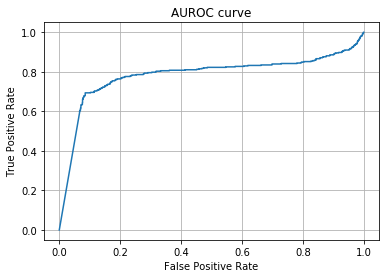

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_curve
y_pred_proba=estimators[0].predict_proba(x_test)
fpr,tpr,threshold=roc_curve(y_test,y_pred_proba[:,1])
print(len(fpr),len(tpr))
plt.plot((fpr),tpr)
plt.title('AUROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

In [75]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,y_pred_proba[:,1]))

0.7837770318669673


Dimentionality reduction<br>
Now let us try applying standard scaling and Principal component analysis to fit this model.

In [6]:
from sklearn.preprocessing import StandardScaler as sc
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import accuracy_score

In [53]:
def build_fn1(activation='relu',optimizer='adam',regularization_param=0.1,input_dim=3):
    model=Sequential()
    model.add(Dense(2,activation=activation,kernel_initializer=tf.keras.initializers.HeNormal(),kernel_regularizer=l1(regularization_param)))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
    return model

model=KerasClassifier(build_fn=build_fn1,batch_size=15, epochs=10, optimizer='rmsprop', regularization_param=0.01)
pipe=Pipeline([('StandardScaler',sc()),('build_fn1',model)])
pipe.fit(x_train,y_train)
print('Accuracy without PCA:',accuracy_score(pipe.predict(x_test)>0.5,y_test))
pipe=Pipeline([('StandardScaler',sc()),('pca',PCA(n_components=60)),('build_fn1',model)])
pipe.fit(x_train,y_train)
print('Accuracy with PCA after reducing 17 least important features:',accuracy_score(pipe.predict(x_test)>0.5,y_test))

Epoch 1/10
658/658 [==============================] - 1s 865us/step - loss: 0.6832 - accuracy: 0.7820
Epoch 2/10
658/658 [==============================] - 1s 1ms/step - loss: 0.3995 - accuracy: 0.8473
Epoch 3/10
658/658 [==============================] - 1s 1ms/step - loss: 0.3296 - accuracy: 0.8531
Epoch 4/10
658/658 [==============================] - 1s 972us/step - loss: 0.3034 - accuracy: 0.8548
Epoch 5/10
658/658 [==============================] - 1s 961us/step - loss: 0.3176 - accuracy: 0.8402
Epoch 6/10
658/658 [==============================] - 1s 1ms/step - loss: 0.2922 - accuracy: 0.8734
Epoch 7/10
658/658 [==============================] - 1s 989us/step - loss: 0.2870 - accuracy: 0.8990
Epoch 8/10
658/658 [==============================] - 1s 1ms/step - loss: 0.2881 - accuracy: 0.8944
Epoch 9/10
658/658 [==============================] - 1s 1ms/step - loss: 0.2879 - accuracy: 0.8935
Epoch 10/10
658/658 [==============================] - 1s 1ms/step - loss: 0.2899 - accuracy

/home/surya/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/10
658/658 [==============================] - 1s 1000us/step - loss: 0.8014 - accuracy: 0.7137
Epoch 2/10
658/658 [==============================] - 1s 989us/step - loss: 0.4453 - accuracy: 0.8699
Epoch 3/10
658/658 [==============================] - 1s 1ms/step - loss: 0.3737 - accuracy: 0.8790
Epoch 4/10
658/658 [==============================] - 1s 1ms/step - loss: 0.3233 - accuracy: 0.8874
Epoch 5/10
658/658 [==============================] - 1s 1ms/step - loss: 0.3190 - accuracy: 0.8871
Epoch 6/10
658/658 [==============================] - 1s 967us/step - loss: 0.3170 - accuracy: 0.8862
Epoch 7/10
658/658 [==============================] - 1s 1ms/step - loss: 0.3072 - accuracy: 0.8919
Epoch 8/10
658/658 [==============================] - 1s 1ms/step - loss: 0.3098 - accuracy: 0.8906
Epoch 9/10
658/658 [==============================] - 1s 962us/step - loss: 0.3112 - accuracy: 0.8902
Epoch 10/10
658/658 [==============================] - 1s 914us/step - loss: 0.3063 - accur

/home/surya/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy with PCA after reducing 17 least important features: 0.8694241686942417
